# Data Profiling and Cleaning

We profiled and cleaned the NYC opendata `DOB NOW: Build – Job Application Filings` data using pandas and openclean

Run all the cells in order to profile and clean the data

Robert Ronan, Sheng Tong, Jerry Lee

In [1]:
import openclean
import glob
import pandas as pd
import numpy as np


# Data Downloading

Download the data using openClean

In [2]:
import gzip
import humanfriendly
import os

from openclean.data.source.socrata import Socrata

dataset = Socrata().dataset('w9ak-ipjd')
datafile = './w9ak-ipjd.tsv.gz'

if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        print('Downloading ...\n')
        dataset.write(f)


fsize = humanfriendly.format_size(os.stat(datafile).st_size)
print("Using '{}' in file {} of size {}".format(dataset.name, datafile, fsize))

Using 'DOB NOW: Build – Job Application Filings' in file ./w9ak-ipjd.tsv.gz of size 26.76 MB


# Data Loading

Load the data into pandas and openClean dataset object

In [3]:
import pandas as pd
from openclean.pipeline import stream

df  = pd.read_csv(datafile, dtype='object', sep='\t')
ds = stream(datafile)

In [4]:
np.__version__

'1.21.4'

In [5]:
pd.__version__

'1.3.4'

In [6]:
import glob

In [7]:
glob.glob("*")

['bty7-2jhb.tsv.gz',
 'cleaned_data.csv',
 'dm9a-ab7w.tsv.gz',
 'DOB_Job_Cleaning.ipynb',
 'DOB_NOW_BUILD.ipynb',
 'DOB_NOW_Electrical.ipynb',
 'Historical_DOB_Permit.ipynb',
 'ic3t-wcy2.tsv.gz',
 'README.md',
 'w9ak-ipjd.tsv.gz']

### Get some basic info about the dataset columns

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241335 entries, 0 to 241334
Data columns (total 82 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Job Filing Number                          241335 non-null  object
 1   Filing Status                              241335 non-null  object
 2   House No                                   241335 non-null  object
 3   Street Name                                241335 non-null  object
 4   Borough                                    241335 non-null  object
 5   Block                                      241335 non-null  object
 6   LOT                                        241335 non-null  object
 7   Bin                                        241335 non-null  object
 8   Commmunity - Board                         241155 non-null  object
 9   Work on Floor                              237577 non-null  object
 10  Apt./Condo No(s)    

If any rows are complete duplicates, drop them

In [9]:
df = df.drop_duplicates()

Take an a look at some of the rows to get an idea of what the datset looks like

In [10]:
df

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type
0,B00000471-I1,Approved,21,PORTER AVENUE,BROOKLYN,3010,1,3824339,301,OG - On Grade,...,False,False,False,False,False,False,False,False,False,Alteration
1,B00003886-I1,Permit Entire,156,EAST 54 STREET,BROOKLYN,4659,12,3101503,317,Ope 001 thru 001,...,False,False,False,False,False,True,False,False,False,Alteration
2,B00015822-P1,Approved,734,GLENMORE AVENUE,BROOKLYN,4002,14,3426341,305,OG - On Grade,...,False,False,False,False,False,False,False,False,False,Alteration
3,B00016519-P1,Approved,730,GLENMORE AVENUE,BROOKLYN,4002,13,3424440,305,OG - On Grade,...,False,False,False,False,False,False,False,False,False,Alteration
4,B00020917-I1,LOC Issued,2071,58 STREET,BROOKLYN,5500,51,3131262,312,Gro 001 thru 002,...,False,False,False,False,False,False,False,False,False,Alteration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241330,M00293740-I1,Permit Entire,765,PARK AVENUE,MANHATTAN,1407,1,1042841,108,Facade,...,False,False,False,False,False,False,False,False,False,Alteration
241331,Q00442254-I1,LOC Issued,56-20,59 STREET,QUEENS,2666,20,4059726,405,Cellar,...,False,False,False,False,False,False,False,False,False,Alteration
241332,Q00470920-I1,LOC Issued,233-02,NORTHERN BOULEVARD,QUEENS,8166,20,4169906,411,Open Space,...,False,False,False,False,False,False,False,False,False,Alteration
241333,S00153040-I1,Permit Entire,51,DICKIE AVENUE,STATEN ISLAND,391,451,5011395,501,Ope 0 thru 0,...,False,False,False,False,False,False,False,False,False,Alteration


In [11]:
# Need 382 examples for sample

In [12]:
df_sample = df.sample(382).copy()

In [13]:
df_sample

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type
215306,Q00506132-P4,Approved,5608,OCEANIA STREET,QUEENS,7437,8,4160042,411,"Attic, Attic, Attic, Cellar, Cellar, Cellar, C...",...,True,True,True,False,False,False,True,False,False,Alteration
36961,B00034798-I1,LOC Issued,585,FULTON STREET,BROOKLYN,149,15,3000353,302,Ope 001 thru 001,...,False,False,False,False,False,True,False,False,False,Alteration
135836,M00138785-I1,Permit Entire,888,PARK AVENUE,MANHATTAN,1393,33,1041874,108,Ope 001 thru 001,...,False,False,False,False,False,True,False,False,False,Alteration
237297,X00451706-I1,LOC Issued,997,BROOK AVENUE,BRONX,2391,45,2120131,203,Facade,...,False,False,False,False,False,False,False,False,False,Alteration
174937,M00469377-I1,Permit Entire,215,WEST 17 STREET,MANHATTAN,767,7505,1013854,104,Sidewalk,...,False,False,False,False,False,False,False,False,False,Alteration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68526,M00429203-I1,Permit Entire,1261,BROADWAY,MANHATTAN,833,6,1015803,105,Floor Number(s) 2 through 2,...,False,False,True,False,False,False,False,False,False,Alteration
86259,X00524780-I1,Permit Entire,2183,MORRIS AVENUE,BRONX,3181,42,2013985,205,Open Space,...,False,False,False,False,False,False,False,False,False,Alteration
18918,M00527109-I1,Permit Entire,235,EAST 5 STREET,MANHATTAN,461,39,1006631,103,Floor Number(s) 001 through 002,...,False,True,False,False,False,False,False,False,False,Alteration
173496,M00459679-I1,Filing Withdrawn,254,WEST 54 STREET,MANHATTAN,1025,58,1024843,105,"Cellar, Mezzanine 001 through 001, Roof",...,False,False,False,False,False,False,False,False,False,Alteration


## Describe columns in groups so they fit on screen

In [14]:
df[df.columns[:20]].describe()

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,Apt./Condo No(s),Applicant Professional Title,Applicant License #,Applicant First Name,Applicants Middle Initial,Applicant Last Name,Owner's Business Name,Owner's Street Name,City,State
count,241335,241335,241335,241335,241335,241335,241335,241335,241155,237577,13279,241335,241335,241335,0,241335,241159,241335,241335,241335
unique,241335,33,15124,6032,5,10796,812,70071,72,9503,3111,8,5930,2046,0,4706,5314,5240,876,42
top,B00000471-I1,Permit Entire,1,BROADWAY,MANHATTAN,16,1,1012268,105,Open Space,1,PE,035839,PAUL,NaN,O'CONNOR,BRIAN T. O'CONNOR,130 N. WINDHORST AVE,NEW YORK,NY
freq,1,90938,2225,6512,96563,679,29632,249,22956,27095,1560,159914,5190,7155,NaN,5308,5191,5191,67048,208351


In [15]:
# Notes:
# most of these are the same DOB job apps


In [16]:
df[df.columns[20:40]].describe()

,Zip,Filing Representative First Name,Filing Representative Middle Initial,Filing Representative Last Name,Filing Representative Business Name,Filing Representative Street Name,Filing Representative City,Filing Representative State,Filing Representative Zip,Sprinkler (Work Type),Plumbing (Work Type),Initial Cost,Total Construction Floor Area,Review Building Code,Little E,Unmapped/CCO Street,Request Legalization,Includes Permanent Removal,In Compliance with NYCECC,Exempt from NYCECC
count,241335,192488,0,192488,191568,192466,192488,192488,192488,241335,241335,241335,235236,238251,239891,158287,434,434,241335,241335
unique,1205,1712,0,2224,2434,2556,371,21,459,2,2,23897,17557,4,2,2,2,2,2,2
top,10001,ELY,NaN,SEPULVEDA,AE DESIGN SOLUTION INC.,71 LEONARD STREET,NEW YORK,NY,10007,False,False,1000,0,2014,No,No,No,No,False,False
freq,11944,7406,NaN,7549,7406,7444,77530,188464,18658,241132,241114,21396,39386,205126,225717,158100,390,431,146221,168581


In [17]:
# Fillings are different but the concept is the same where its just city, states, names etc


In [18]:
df[df.columns[40:60]].describe()

,Building Type,Existing Stories,Existing Height,Existing Dwelling Units,Proposed No of Stories,Proposed Height,Proposed Dwelling Units,SpecialInspectionRequirement,Special Inspection Agency Number,ProgressInspectionRequirement,Built 1 information value,Built 2 information value,Built 2 A information value,Built 2 B information value,Standpipe,Antenna,Curb Cut,Sign,Fence,Scaffold
count,235240,41924,30108,193303,44284,32365,196048,109281,174877,93743,12391,12391,12391,12391,241335,241335,241335,241335,241335,241335
unique,6,185,634,812,191,649,838,3223,5860,4070,2,2,2,2,2,2,2,2,2,2
top,Other,2,25,0,2,25,0,Fire-Resistant Penetrations and Joints,Final,000423,Yes,No,No,No,False,False,False,False,False,False
freq,191137,8052,1693,72375,8187,1712,66238,32868,96502,1299,12318,12318,12349,12360,241299,239138,238805,234860,232267,234697


In [19]:
# different values but a lot of binary so easy to check

In [20]:
df[df.columns[60:80]].describe()

,Shed,Latitude,Longitude,Council District,Census Tract,NTA,BIN,Filing Date,Current Status Date,Permit Issue Date,Boiler Equipment (Work Type),Earth Work (Work Type),Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type)
count,241335,240577,240577,240577,240577,240577,236208,240675,240675,152066,241335,241335,241335,241335,241335,241335,241335,241335,241335,241335
unique,2,63586,62110,51,1317,194,64852,237362,239453,1232,2,2,2,2,2,2,2,2,2,2
top,False,40.750934,-74.005955,4,99,Midtown-Midtown South,3000000,04/01/2019 06:08:00 PM,12/02/2021 03:58:12 PM,11/15/2021 12:00:00 AM,False,False,False,False,False,False,False,False,False,False
freq,228718,250,289,26050,2100,16452,3857,13,11,547,236480,239784,238586,210839,213755,238840,239708,210897,229452,240556


In [21]:
# geo maps have different names but easy to keep track of
# a lot more binary data

In [22]:
df[df.columns[80:100]].describe()

,Temporary Place of Assembly (Work Type),Job Type
count,241335,241335
unique,2,5
top,False,Alteration
freq,237753,229960


In [23]:
# a lot of low counts

In [24]:
df.columns

Index(['Job Filing Number', 'Filing Status', 'House No', 'Street Name',
       'Borough', 'Block', 'LOT', 'Bin', 'Commmunity - Board', 'Work on Floor',
       'Apt./Condo No(s)', 'Applicant Professional Title',
       'Applicant License #', 'Applicant First Name',
       'Applicants Middle Initial', 'Applicant Last Name',
       'Owner's Business Name', 'Owner's Street Name', 'City', 'State', 'Zip',
       'Filing Representative First Name',
       'Filing Representative Middle Initial',
       'Filing Representative Last Name',
       'Filing Representative Business Name',
       'Filing Representative Street Name', 'Filing Representative City',
       'Filing Representative State', 'Filing Representative Zip',
       'Sprinkler (Work Type)', 'Plumbing (Work Type)', 'Initial Cost',
       'Total Construction Floor Area', 'Review Building Code', 'Little E',
       'Unmapped/CCO Street', 'Request Legalization',
       'Includes Permanent Removal', 'In Compliance with NYCECC',
       'Ex

## Renaming columns (if they exist)

In [25]:
df = df.rename(columns={
                          "Owner'sPhone #": "Owner's Phone #" 
                        , "Owner'sHouse Street Name": "Owner's House Street Name"
                        , "Paid": "Paid Date"
                        , "Fully Paid": "Fully Paid Date"
                        , "Assigned": "Assigned Date"
                        , "Approved": "Approved Date"
                        , "Job Status Descrp": "Job Status Description"
                        , "Community - Board": "Community Board"
                        , "Adult Estab": "Adult Establishment"
                        , "Pre- Filing Date": "Pre-Filing Date"
                        , "Total Est. Fee": "Total Estimated Fee"
                        , "Horizontal Enlrgmt": "Horizontal Enlargement"
                        , "Vertical Enlrgmt": "Vertical Enlargement"
                        , "ExistingNo. of Stories": "Existing # of Stories"
                        , "Proposed No. of Stories": "Proposed # of Stories"
                        , "Zoning Dist1": "Zoning District 1"
                        , "Zoning Dist2": "Zoning District 2"
                        , "Zoning Dist3": "Zoning District 3"
                        , "City": "Owner's House City"
                        , "State": "Owner's House State"
                        , "Zip": "Owner's House Zip"
                        , "DOBRunDate": "DOB Run Date"
                       })

#Lower cased but not sure if this is necessary
'''
df = df.rename(columns={
                        , "JOB_S1_NO": "Job S1 #"
                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"
                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"
                        , "SIGNOFF_DATE": "Signoff Date"
                        , "SPECIAL_ACTION_STATUS": "Special Action Status"
                        , "SPECIAL_ACTION_DATE": "Special Action Date"
                        , "BUILDING_CLASS": "Building Class"
                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"
                        , "Latitude": "GIS Latitude"
                        , "Longitude": "GIS Longitude"
                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"
                        , "GIS_CENSUS_TRACT": "GIS Census Tract"
                        , "GIS_NTA_NAME": "GIS NTA Name"
                        , "GIS_BIN": "GIS Bin"
                        })
'''

'\ndf = df.rename(columns={\n                        , "JOB_S1_NO": "Job S1 #"\n                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"\n                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"\n                        , "SIGNOFF_DATE": "Signoff Date"\n                        , "SPECIAL_ACTION_STATUS": "Special Action Status"\n                        , "SPECIAL_ACTION_DATE": "Special Action Date"\n                        , "BUILDING_CLASS": "Building Class"\n                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"\n                        , "Latitude": "GIS Latitude"\n                        , "Longitude": "GIS Longitude"\n                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"\n                        , "GIS_CENSUS_TRACT": "GIS Census Tract"\n                        , "GIS_NTA_NAME": "GIS NTA Name"\n                        , "GIS_BIN": "GIS Bin"\n                        })\n'

#### Method to get an idea of the top 10 values of a column

In [26]:
def show_vals(column_name, show_rows=10, df=df):
    print("Top {} {}:\n".format(show_rows, column_name))
    print(df[column_name].value_counts(dropna=False)[:show_rows])
    print()

### Examining Job Filing Numbers (replaced Job # with Job Filling Numbers)

Some repition in the Job Filing Number's, but nothing major. We will check some of the repeated Job Filing Numbers to be sure they actually refer to the same jobs

In [27]:
df['Job Filing Number'].value_counts(dropna=False)

B00000471-I1    1
M00350272-I1    1
M00350223-P2    1
M00350234-I1    1
M00350227-I1    1
               ..
S00070373-I1    1
S00072030-I1    1
S00072394-I1    1
S00072790-I1    1
X00567922-I1    1
Name: Job Filing Number, Length: 241335, dtype: int64

Nothing weird looking here

In [28]:
df['Job Filing Number'].min()

'B00000043-I1'

In [29]:
df['Job Filing Number'].max()

'X00642146-I1'

No Job Filing Numbers starting with 0, so there are integer values, unlike Doc # which has values 01, 02, etc.

In [30]:
df.loc[df['Job Filing Number'].str.startswith('0')]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type


Fraction of Rows with unique job numbers

In [31]:
df['Job Filing Number'].nunique()/df['Job Filing Number'].count()

1.0

Group by Job Filing Number and check if latitude and longitude are the same all the same for the job, which would indicate different instances of the Job Filing Number all refer to the same Job. - replaced GIS_LATITUDE and GIS_LONGITUDE with Latitude and Longitude

In [32]:
group = df[['Job Filing Number', 'Latitude', 'Longitude']].groupby('Job Filing Number')

This will take a little while to run

In [33]:
tranformed = group.aggregate(lambda x: x.unique().shape[0])

Jobs with multiple latitude and longitudes:

In [34]:
# no bad jobs
tranformed.loc[(tranformed['Latitude']!=1)
              |(tranformed['Longitude']!=1)]

,Latitude,Longitude
Job Filing Number,,


In [35]:
potential_bad_jobs = list(tranformed.loc[(tranformed['Latitude']!=1)
              |(tranformed['Longitude']!=1)].index.unique())

Separate these into a temporary dataframe to play around with:

In [36]:
df_temp = df.loc[df['Job Filing Number'].isin(potential_bad_jobs)].copy()

In [37]:
df_temp = df_temp.sort_values(['Job Filing Number', 'Latitude', 'Longitude'])

Most of these are just missing lat and long values.

The others look to be Jobs that manage multiple houses/lots in a small area, so are probably correct

In [38]:
df_temp[df_temp.duplicated(subset=['Job Filing Number', 'Block', 'Lot', 'Bin #', 'Job Type'], keep=False)]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type


#### Later, after we have cleaned more values, we will fill these missing values by Job Filing Number

Remove Jobs we know to be just missing data from the list of bad jobs

In [39]:
not_bad_jobs = df_temp[df_temp.duplicated(subset=['Job Filing Number', 'Block', 'Lot', 'Bin #', 'Job Type'], keep=False)]['Job Filing Number'].unique()

In [40]:
df_temp = df_temp.loc[~df_temp['Job Filing Number'].isin(not_bad_jobs)]

All of these are jobs that handle multiple lots or House Nos, which explains why the lat/long change 

Job Filing Number 122171130 and 122222638 may be exact copies of each other though

In [41]:
df_temp

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type


In [42]:
df_temp = df_temp.loc[(df_temp['Job Filing Number'].isin(['122171130', '122222638']))]

Latest action date is different, so its probably differnt but very similar jobs 

In [43]:
df_temp[df_temp.columns[0:20]]


,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,Apt./Condo No(s),Applicant Professional Title,Applicant License #,Applicant First Name,Applicants Middle Initial,Applicant Last Name,Owner's Business Name,Owner's Street Name,Owner's House City,Owner's House State


Check if any Job Filing Numbers have non-digit values

In [44]:
df['Job Filing Number'] = df['Job Filing Number'].astype('str')

In [45]:
df.loc[(~df['Job Filing Number'].isna())
       &(~df['Job Filing Number'].str.isdigit())]['Job Filing Number']

0         B00000471-I1
1         B00003886-I1
2         B00015822-P1
3         B00016519-P1
4         B00020917-I1
              ...     
241330    M00293740-I1
241331    Q00442254-I1
241332    Q00470920-I1
241333    S00153040-I1
241334    X00567922-I1
Name: Job Filing Number, Length: 241335, dtype: object

In [46]:
df['Job Filing Number'].describe()

count           241335
unique          241335
top       B00000471-I1
freq                 1
Name: Job Filing Number, dtype: object

## Examining and reparing House Nos (replaced  to house Num)

House No's appear to be mostly ints

However, there are legitimate house numbers with dashes so we'll have to make them strings

In [47]:
show_vals('House No', show_rows=10)

Top 10 House No:

1      2225
200    1402
10     1220
150     980
100     943
50      925
11      909
55      884
2       836
40      819
Name: House No, dtype: int64



Replace NaN values with empty strings, then convert column to string, and make everything uppercase


In [48]:
df['House No'].fillna('', inplace=True)
df['House No'] = df['House No'].astype('str')
df['House No'] = df['House No'].str.upper()

Check for numbers spelled out as words

In [49]:
df.loc[(~df['House No'].isna())
       &(df['House No'].str.isalpha())]['House No']

1434      ONE
5977      ONE
10489     ONE
16653     ONE
17967     ONE
47652     ONE
49184     ONE
50308     ONE
50309     ONE
50312     ONE
69102       I
106769    ONE
106770    ONE
118877    ONE
119076    ONE
161079    ONE
165749    ONE
171919    ONE
171926    ONE
Name: House No, dtype: object

Maybe the House No and borough were flipped in the 'manhattan' case?

In [50]:
# Nope:
df.loc[df['House No'].str.strip('')=='MANHATTAN'][['House No', 'Borough']]

,House No,Borough


Check if thses are empty strings:

In [51]:
df.loc[(~df['House No'].str.contains('\\d', regex=True))]['House No']

1434      ONE
5977      ONE
10489     ONE
16653     ONE
17967     ONE
47652     ONE
49184     ONE
50308     ONE
50309     ONE
50312     ONE
69102       I
106769    ONE
106770    ONE
118877    ONE
119076    ONE
161079    ONE
165749    ONE
171919    ONE
171926    ONE
Name: House No, dtype: object

Replace spelling of numbers with their value, and remove values 'PIER',  'MANHATTAN',  'NO NUMBER'

In [52]:
df.loc[df['House No'].str.strip('')=='ONE', 'House No'] = '1'
df.loc[df['House No'].str.strip('')=='PIER', 'House No'] = ''
df.loc[df['House No'].str.strip('')=='MANHATTAN', 'House No'] = ''
df.loc[df['House No'].str.strip('')=='NO NUMBER', 'House No'] = ''


Most of these will probably be legitimate house numbers, since house numbers can have dashes

In [53]:
df.loc[(~df['House No'].isna())
       &(~df['House No'].str.isdigit())]['House No']

197        118 1/2
288           500A
408       2305 GAR
743           405A
1066          120A
            ...   
240699       6201A
240857       2161A
240929    3035 GAR
241331       56-20
241332      233-02
Name: House No, Length: 43741, dtype: object

Check non-numeric House No's that don't have dashes

In [54]:
df.loc[(~df['House No'].isna())
       &(~df['House No'].str.isdigit())
      &(~df['House No'].str.contains('-', regex=False))]['House No'][:25]

197      118 1/2
288         500A
408     2305 GAR
743         405A
1066        120A
1071      97 GAR
1289        512A
1382        837A
1656      2612 C
1671        256A
1818        353A
2003     687 1/2
2130        256A
2158    460 REAR
2247      2612 C
2248      2612 C
2249      2612 C
2358        454A
2376     176 GAR
2442        140B
2455        855A
2471     2061GAR
2523        256A
2606        410A
2607        410A
Name: House No, dtype: object

We see a mix of reference to the house's garage, the rear house and single letters that likely indicate apartments in multi-occupancy venues. 

We will standardize the formatting, and maintain the reference to garage, rear, and appartment, since there is no apartment column for the job.

First split the numbers and words with a space

In [55]:
df['House No'] = df['House No'].str.replace(pat='(?P<one>\\d)(?P<two>[A-Z]+)', repl='\g<one> \g<two>', regex=True)

Now we will fix the formatting for garage and 
remove references to north, south, east, west, since they should be in street #

In [56]:
df['House No'] = df['House No'].str.replace(pat='(?P<one>GAR$)', repl='GARAGE', regex=True)

In [57]:
df['House No'] = df['House No'].str.replace(pat='NORTH([A-Z]+)?', repl='', regex=True)
df['House No'] = df['House No'].str.replace(pat='EAST([A-Z]+)?', repl='', regex=True)
df['House No'] = df['House No'].str.replace(pat='SOUTH([A-Z]+)?', repl='', regex=True)
df['House No'] = df['House No'].str.replace(pat='WEST([A-Z]+)?', repl='', regex=True)

In [58]:
# Confirm that it worked correctly:
df.loc[(~df['House No'].isna())
       &(~df['House No'].str.isdigit())
       &(~df['House No'].str.contains('-', regex=False))]['House No'][:30]

197         118 1/2
288           500 A
408     2305 GARAGE
743           405 A
1066          120 A
1071      97 GARAGE
1289          512 A
1382          837 A
1656         2612 C
1671          256 A
1818          353 A
2003        687 1/2
2130          256 A
2158       460 REAR
2247         2612 C
2248         2612 C
2249         2612 C
2358          454 A
2376     176 GARAGE
2442          140 B
2455          855 A
2471    2061 GARAGE
2523          256 A
2606          410 A
2607          410 A
2618          410 A
2714          110 A
2786          393 A
2909          204 A
2938          140 B
Name: House No, dtype: object

## Looking at Binary/Pseudo-binary columns

In [59]:
for col in df.columns:
    if (df[col].nunique() < 5) &  (df[col].nunique() != 0):
        show_vals(col)

Top 10 Sprinkler (Work Type):

False    241132
True        203
Name: Sprinkler (Work Type), dtype: int64

Top 10 Plumbing (Work Type):

False    241114
True        221
Name: Plumbing (Work Type), dtype: int64

Top 10 Review Building Code:

2014             205126
1968              21568
Prior to 1968      9899
NaN                3084
2008               1658
Name: Review Building Code, dtype: int64

Top 10 Little E:

No     225717
Yes     14174
NaN      1444
Name: Little E, dtype: int64

Top 10 Unmapped/CCO Street:

No     158100
NaN     83048
Yes       187
Name: Unmapped/CCO Street, dtype: int64

Top 10 Request Legalization:

NaN    240901
No        390
Yes        44
Name: Request Legalization, dtype: int64

Top 10 Includes Permanent Removal:

NaN    240901
No        431
Yes         3
Name: Includes Permanent Removal, dtype: int64

Top 10 In Compliance with NYCECC:

False    146221
True      95114
Name: In Compliance with NYCECC, dtype: int64

Top 10 Exempt from NYCECC:

False    16858

Fill null values with False/'N'

In [60]:
df['Little E'].fillna('No', inplace=True)
df['Unmapped/CCO Street'].fillna('No', inplace=True)
df['Request Legalization'].fillna('No', inplace=True)
df['Includes Permanent Removal'].fillna('No', inplace=True)
df['Built 1 information value'].fillna('No', inplace=True)
df['Built 2 information value'].fillna('No', inplace=True)
df['Built 2 A information value'].fillna('No', inplace=True)
df['Built 2 B information value'].fillna('No', inplace=True)

## Checking Monetary Values for consistency

In [61]:
show_vals("Initial Cost")

Top 10 Initial Cost:

1000     21396
5000     18943
1        13049
10000     9603
0         8871
3000      5538
15000     5500
20000     4860
8000      4116
6000      3637
Name: Initial Cost, dtype: int64



In [62]:
df['Initial Cost'] = df['Initial Cost'].astype('str')

Check if any values are not decimals

In [63]:
df.loc[~df["Initial Cost"].str.contains(".", regex=False)]["Initial Cost"].value_counts()

1000      21396
5000      18943
1         13049
10000      9603
0          8871
          ...  
15795         1
145300        1
31998         1
17235         1
626400        1
Name: Initial Cost, Length: 16598, dtype: int64

Dollar signs should be removed and added to column name so we can treat this column as a number

In [64]:
df["Initial Cost"] = df["Initial Cost"].str.replace("$", '', regex=False)

However we can't convert this to integer dollars because there are decimals.

In [65]:
df.loc[df["Initial Cost"].str.contains("\\.[^0]", regex=True)]["Initial Cost"]

80           2000.5
101       1705000.5
108       1555130.2
121       1555130.2
142       342927.73
            ...    
241104     49980.45
241197      20552.4
241200     20457.25
241205     73741.25
241223      2993.76
Name: Initial Cost, Length: 10028, dtype: object

Convert to floats

In [66]:
df["Initial Cost"] = df["Initial Cost"].astype('float')

In [67]:
show_vals("Initial Cost")

Top 10 Initial Cost:

1000.0        21396
5000.0        18943
1.0           13049
10000.0        9603
0.0            8871
              ...  
10000000.0       20
32900.0          20
60500.0          20
148000.0         20
10.0             20
Name: Initial Cost, Length: 665, dtype: int64



For unclear reasons, adding xticks makes this plot incredibly slow to display.

<AxesSubplot:title={'center':'Initial Cost Frequncy (log-log)'}, ylabel='Frequency'>

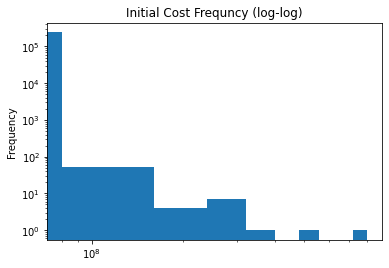

In [68]:
df["Initial Cost"].plot(kind='hist', loglog=True, title='Initial Cost Frequncy (log-log)')

Intial costs appear to be distributed roughly exponentially 

<AxesSubplot:title={'center':'Initial Cost Frequncy, values < 10^8 (log)'}, ylabel='Frequency'>

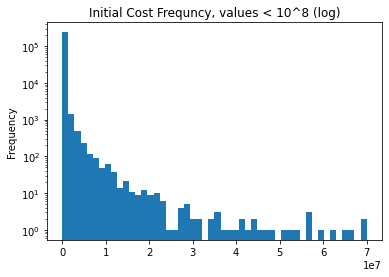

In [69]:
df.loc[df["Initial Cost"]<10**8]["Initial Cost"].plot(kind='hist', logy=True, bins=50, title='Initial Cost Frequncy, values < 10^8 (log)')

Now that we've mapped these to numerical values, we can identifiy additional issues

#### Fixing Initial costs

In [70]:
# fine
df["Initial Cost"].min()

0.0

In [71]:
# maybe a fill-in?
df["Initial Cost"].max()

800010000.0

In [72]:
df.loc[df['Initial Cost'] < 0]['Initial Cost']

Series([], Name: Initial Cost, dtype: float64)

no negative values

This is test data:

In [73]:
# nothing seems odd
df.loc[df['Initial Cost'] == 800010000.0]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type
17503,S00549493-I1,Approved,280,RICHMOND TERRACE,STATEN ISLAND,14,24,5000124,501,"Cellar, Floor Number(s) 1 through 1, Floor Num...",...,False,False,True,False,False,False,False,False,False,Alteration


<AxesSubplot:title={'center':'Initial Cost Frequncy (log)'}, ylabel='Frequency'>

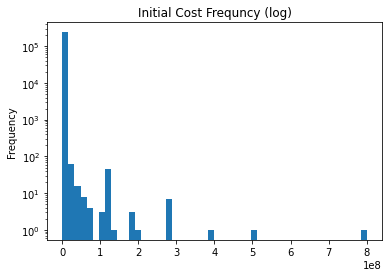

In [74]:
df["Initial Cost"].plot(kind='hist', logy=True, bins=50, title='Initial Cost Frequncy (log)')

## Checking owner's information

In [75]:
show_vals("Owner's Business Name")
show_vals("Owner's House City")
show_vals("Owner's House State")
show_vals("Owner's House Zip")

Top 10 Owner's Business Name:

BRIAN T. O'CONNOR                5191
ASHRAF CORP                      3906
SYED ENGINEERING, P.C.           3891
LEON SKVIRSKY PE                 3557
PAUL PERDEK, PROF. ENG. PLLC     3291
JOEL PHAGOO P.E. PLLC            2964
KZ ENGINEERING, PC               2889
ENTHINK ENGINEERING LLC          2859
ASIF JAMIL, RA                   2850
VS CONSULTING ENGINEERING, PC    2823
Name: Owner's Business Name, dtype: int64

Top 10 Owner's House City:

NEW YORK             67048
BROOKLYN             28486
FLUSHING             14084
STATEN ISLAND         8097
JAMAICA               8039
BETPAGE               5191
SYOSSET               4160
HUNTINGDON VALLEY     3948
NYC                   3485
BRONX                 3398
Name: Owner's House City, dtype: int64

Top 10 Owner's House State:

NY    208351
NJ     22476
PA      4859
CT      2229
FL       502
CO       444
OH       296
MO       263
IL       236
MD       179
Name: Owner's House State, dtype: int64

Top 10 O

## Fixing owner's informations

In [76]:
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)new york city")]["Owner's Business Name"].value_counts()

NEW YORK CITY HOUSING AUTHORITY    57
Name: Owner's Business Name, dtype: int64

Normalizes a couple of duplicate names

In [77]:
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace("NEW YORK CITY", "NYC")
df["Owner's Business Name"] = df["Owner's Business Name"].str.upper()
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(".", '', regex=False)
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(",", '', regex=False)

All these are the same thing. Uses clusters to fix

In [78]:
#may have to use fuzzy/cluster to fix this problem
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)HOUSING AUTHORITY")]["Owner's Business Name"].value_counts()

NYC HOUSING AUTHORITY    64
Name: Owner's Business Name, dtype: int64

Used clusters to try to fix the rest of them further below

In [79]:
df["Owner's House State"].value_counts()

NY    208351
NJ     22476
PA      4859
CT      2229
FL       502
CO       444
OH       296
MO       263
IL       236
MD       179
TX       150
VA       148
MY       146
MA       124
MN       112
CA        83
MI        80
NC        78
GA        78
WI        68
WA        58
SC        55
NE        53
KS        45
OK        37
DC        31
AR        29
AZ        24
IN        21
DE        12
31        12
TN         9
VT         7
RI         6
KY         6
OR         6
ON         5
ID         5
ME         4
LA         3
NH         3
PR         2
Name: Owner's House State, dtype: int64

Since the states can be outside NYC, these are probably fine

In [80]:
df["Owner's House Zip"].value_counts()

10001    11944
10018    11568
10038    10173
11354     6924
10013     5712
         ...  
78736        1
07071        1
08553        1
06032        1
08886        1
Name: Owner's House Zip, Length: 1205, dtype: int64

## Looking at Phone Numbers:

### No phone numbers

### Checking additional numerical columns for coherency

In [81]:
numerical_columns = ['Proposed No of Stories',
      'Existing Height', 'Proposed Height',
       'Existing Dwelling Units', 'Proposed Dwelling Units']

Try to convert these all to numeric values

In [82]:
for col in numerical_columns:
    df[col] = df[col].astype('str')

In [83]:
for col in numerical_columns:
    print(col)
    print(df.loc[(~df[col].str.isdigit())
      &(df[col]!='nan')][col])
    print()

Proposed No of Stories
Series([], Name: Proposed No of Stories, dtype: object)

Existing Height
Series([], Name: Existing Height, dtype: object)

Proposed Height
Series([], Name: Proposed Height, dtype: object)

Existing Dwelling Units
Series([], Name: Existing Dwelling Units, dtype: object)

Proposed Dwelling Units
Series([], Name: Proposed Dwelling Units, dtype: object)



### Fix these issues so we can covnert to numerical values:

We're going to assume like before that these values are unintentially entered as negative when they should be postive

In [84]:
df['Proposed Height'] = df['Proposed Height'].str.replace('-', '', regex=False)

In [85]:
df['Existing Dwelling Units'] = df['Existing Dwelling Units'].str.replace('.', '', regex=False)
df['Existing Dwelling Units'] = df['Existing Dwelling Units'].str.replace('.', '', regex=False)

In [86]:
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('.', '', regex=False)
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('-', '', regex=False)
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('NONE', '0', regex=False)
df['Proposed Dwelling Units'] = df['Proposed Dwelling Units'].str.replace('NON5', '0', regex=False)

##### Try to convert to numerical values now:

In [87]:
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

In [88]:
for col in numerical_columns:
    show_vals(col)

Top 10 Proposed No of Stories:

NaN     197051
2.0       8187
3.0       5876
4.0       4789
6.0       4159
1.0       3526
5.0       3381
7.0       1351
12.0      1155
8.0        977
15.0       705
9.0        645
14.0       592
16.0       571
13.0       563
10.0       514
Name: Proposed No of Stories, dtype: int64

Top 10 Existing Height:

NaN      211227
25.0       1693
30.0       1296
60.0       1101
40.0        795
20.0        793
35.0        740
55.0        672
50.0        656
24.0        642
28.0        637
65.0        631
27.0        526
23.0        501
45.0        497
150.0       468
21.0        466
15.0        466
26.0        448
22.0        446
32.0        389
70.0        354
120.0       330
33.0        324
18.0        283
29.0        283
75.0        277
14.0        248
36.0        245
34.0        237
31.0        199
38.0        192
80.0        186
13.0        184
16.0        183
160.0       183
17.0        171
12.0        170
42.0        168
44.0        166
10.0        165
Nam

Lets replace NaN values with 0 here and convert to ints

In [89]:
df['Existing Dwelling Units'].fillna(0, inplace=True)
df['Proposed Dwelling Units'].fillna(0, inplace=True)

In [90]:
df['Existing Dwelling Units'] = pd.to_numeric(df['Existing Dwelling Units'], errors='coerce', downcast='integer')
df['Proposed Dwelling Units'] = pd.to_numeric(df['Proposed Dwelling Units'], errors='coerce', downcast='integer')

In [91]:
for col in numerical_columns:
    print(col)
    print("Minimum: ", df[col].min())
    print("Maximum: ", df[col].max())
    print()

Proposed No of Stories
Minimum:  1.0
Maximum:  1688660.0

Existing Height
Minimum:  0.0
Maximum:  122334456.0

Proposed Height
Minimum:  0.0
Maximum:  28035.0

Existing Dwelling Units
Minimum:  0
Maximum:  600000

Proposed Dwelling Units
Minimum:  0
Maximum:  600000



##### Incorrect numerical values here. The tallest building in NYC in One World Trade Center, with 104 stories, and 1,776 ft. 
 All of these cannot be true:

In [92]:
df.loc[df['Existing Height'] > 1776]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type
8533,B00632573-I1,Plan Examiner Review,256,EAST 9 STREET,BROOKLYN,5360,29,3125593,312,"Floor Number(s) 2 through 3, Floor Number(s) 1...",...,True,True,False,False,False,False,True,False,False,Alteration
12533,M00595011-I1,Permit Entire,1,EAST 57 STREET,MANHATTAN,1293,1,1036049,105,Floor Number(s) 008 through 010,...,False,True,False,False,False,False,False,False,False,Alteration
19332,M00571441-I1,Permit Entire,300,WEST 23 STREET,MANHATTAN,746,7503,1013429,104,Floor Number(s) 9 through 9,...,False,True,False,False,False,False,False,False,False,Alteration
42788,M00609927-I1,Permit Entire,315,HUDSON STREET,MANHATTAN,597,12,1010362,102,Floor Number(s) 5 through 5,...,False,True,False,False,False,False,False,False,False,Alteration
61044,M00605602-I1,Permit Entire,505,5 AVENUE,MANHATTAN,1277,2,1035344,105,Floor Number(s) 07 through 08,...,False,True,False,False,False,False,False,False,False,Alteration
69383,M00457647-I1,Permit Entire,420,LEXINGTON AVENUE,MANHATTAN,1280,7501,1035385,105,Floor Number(s) 3 through 3,...,False,True,False,False,False,False,False,False,False,Alteration
70912,M00504292-I1,LOC Issued,76,TRINITY PLACE,MANHATTAN,51,7,1090830,101,"Floor Number(s) 4 through 4, Floor Number(s) 6...",...,False,True,False,False,False,False,False,False,False,Alteration
121291,B00488244-I1,Incomplete,1465,51 STREET,BROOKLYN,5650,51,3138115,312,NaN,...,False,True,False,False,False,False,False,False,False,Alteration CO
122413,B00499022-I1,Incomplete,163,SMITH STREET,BROOKLYN,385,100,3429019,302,NaN,...,False,True,False,False,False,False,False,False,False,Alteration CO
174989,M00469701-I1,Permit Entire,1605,BROADWAY,MANHATTAN,1020,46,1076195,105,Floor Number(s) 5 through 5,...,False,True,False,False,False,False,False,False,False,Alteration


In [93]:
df.loc[df['Proposed Height'] > 1776]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type
8466,B00625252-S3,Objections,477,SMITH STREET,BROOKLYN,471,200,3428519,306,Floor Number(s) 1 through 29,...,False,False,False,False,False,False,False,False,False,New Building
8533,B00632573-I1,Plan Examiner Review,256,EAST 9 STREET,BROOKLYN,5360,29,3125593,312,"Floor Number(s) 2 through 3, Floor Number(s) 1...",...,True,True,False,False,False,False,True,False,False,Alteration
9645,B00625252-I1,Objections,477,SMITH STREET,BROOKLYN,471,200,3428519,306,NaN,...,False,True,False,False,False,False,False,False,False,New Building
12533,M00595011-I1,Permit Entire,1,EAST 57 STREET,MANHATTAN,1293,1,1036049,105,Floor Number(s) 008 through 010,...,False,True,False,False,False,False,False,False,False,Alteration
19332,M00571441-I1,Permit Entire,300,WEST 23 STREET,MANHATTAN,746,7503,1013429,104,Floor Number(s) 9 through 9,...,False,True,False,False,False,False,False,False,False,Alteration
21395,M00612296-I1,Approved,1400,BROADWAY,MANHATTAN,814,19,1015266,105,Floor Number(s) 18 through 18,...,False,True,False,False,False,False,False,False,False,Alteration
21832,Q00603155-I1,Objections,339,BEACH 44 STREET,QUEENS,15835,61,4301832,414,NaN,...,True,True,False,False,False,False,True,False,False,New Building
28025,Q00612497-I1,Approved,129-31,157 STREET,QUEENS,12271,49,4266097,412,NaN,...,True,True,False,False,False,False,False,False,False,Alteration CO
30375,S00488276-I1,Plan Examiner Review,93,CRAIG AVENUE,STATEN ISLAND,8017,4,5166435,503,NaN,...,True,True,True,False,False,False,True,False,False,New Building
33271,Q00603594-I1,Objections,64-85,BOOTH STREET,QUEENS,3085,55,4072156,406,NaN,...,False,True,False,False,False,False,False,False,False,Alteration CO


The largest number of units in one building in NYC is < 1400

In [94]:
df.loc[df['Existing Height'] >= 1776, 'Existing Height'] = 0
df.loc[df['Proposed Height'] >= 1776, 'Proposed Height'] = 0
df.loc[df['Existing Dwelling Units'] >= 1400, 'Existing Dwelling Units'] = 0
df.loc[df['Proposed Dwelling Units'] >= 1400, 'Existing Dwelling Units'] = 0

## No Districts

## Quick look at GIS

In [95]:
show_vals("Latitude")
show_vals("Longitude")
show_vals("Council District")
show_vals("Census Tract")
show_vals("NTA")
show_vals("BIN")

Top 10 Latitude:

NaN          758
40.750934    250
40.752732    242
40.751098    190
40.752825    177
40.760289    173
40.748276    168
40.752262    167
40.754329    159
40.755352    153
Name: Latitude, dtype: int64

Top 10 Longitude:

NaN           758
-74.005955    289
-73.978138    242
-73.992926    190
-73.980157    173
-73.975464    170
-73.984690    168
-73.999830    168
-73.997051    168
-73.998578    159
Name: Longitude, dtype: int64

Top 10 Council District:

4     26050
3     19596
1     14241
33    10105
2      9587
6      8278
39     6535
34     5741
26     5640
38     5520
Name: Council District, dtype: int64

Top 10 Census Tract:

99     2100
7      1724
33     1670
119    1635
96     1551
104    1545
21     1467
37     1461
137    1435
94     1356
Name: Census Tract, dtype: int64

Top 10 NTA:

Midtown-Midtown South                         16452
Hudson Yards-Chelsea-Flatiron-Union Square     9510
SoHo-TriBeCa-Civic Center-Little Italy         6721
Upper East Side-Carnegi

In [96]:
#Manually looking at some of these
df[["Latitude", "Longitude", "Council District", "Census Tract", "NTA", "BIN"]]

,Latitude,Longitude,Council District,Census Tract,NTA,BIN
0,40.705678,-73.928298,34,453,Bushwick North,3000000
1,40.655116,-73.926849,41,866,Rugby-Remsen Village,3101503
2,40.675078,-73.883198,37,1166,East New York,3000000
3,40.675062,-73.883314,37,1166,East New York,3000000
4,40.619502,-73.979983,44,468,Borough Park,3131262
...,...,...,...,...,...,...
241330,40.771346,-73.963637,4,128,Upper East Side-Carnegie Hill,1042841
241331,40.724908,-73.908795,30,531,Maspeth,4059726
241332,40.763859,-73.749692,19,150701,Douglas Manor-Douglaston-Little Neck,4169906
241333,40.622071,-74.136575,50,201,Westerleigh,5011395


In [97]:
#shouldn't be 0
df["Latitude"] = df["Latitude"].astype('float')
df["Latitude"].min()

40.499275

In [98]:
df["Latitude"].max()

40.912828

In [99]:
df.loc[df["Latitude"] == 0.0]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type


#### The min and max makes sense as the values range from Staten Island to the Bronx

In [100]:
df["Longitude"] = df["Longitude"].astype('float')
df["Longitude"].min()

-74.254845

In [101]:
df["Longitude"].max()

-73.701392

In [102]:
df.loc[df["Longitude"] == -73.701392]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type
190838,Q00016976-I1,Permit Entire,267-17,HILLSIDE AVENUE,QUEENS,8779,10,4179599,413,Flo 001 thru 001,...,False,False,False,False,False,False,False,False,False,Alteration


#### These longitudes and latitudes range from Queens to Staten Island which is also consistent with our dataset

In [103]:
df["Council District"] = df["Council District"].astype('float')
df["Council District"].min()

1.0

In [104]:
df["Council District"].max()

51.0

#### 1-51 are all valid districts

In [105]:
df["Census Tract"] = df["Census Tract"].astype('float')
df["Census Tract"].min()

1.0

In [106]:
df["Census Tract"].max()

157903.0

In [107]:
df.loc[df["Census Tract"] == 157903]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type
13172,Q00477030-I1,LOC Issued,254-04,84 ROAD,QUEENS,8783,6,4179670,413,"Cellar, Underground",...,False,False,False,False,False,False,False,False,False,Alteration
14052,Q00500069-P2,Approved,256-11,87 AVENUE,QUEENS,8815,5,4180375,413,"Floor Number(s) 01 through 02, Open Space",...,False,False,True,False,False,False,False,False,False,Alteration
14175,Q00419565-S1,LOC Issued,84-26,261 STREET,QUEENS,8790,16,4179897,413,Cellar,...,False,False,False,False,False,False,False,False,False,Alteration
14441,Q00500069-S2,LOC Issued,256-11,87 AVENUE,QUEENS,8815,5,4180375,413,"Floor Number(s) 01 through 02, Open Space",...,False,False,True,False,False,False,False,False,False,Alteration
14443,Q00500069-S1,LOC Issued,256-11,87 AVENUE,QUEENS,8815,5,4180375,413,"Cellar, Floor Number(s) 01 through 02",...,False,False,False,False,False,False,False,False,False,Alteration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218385,Q00552056-I1,Permit Entire,261-11,86 AVENUE,QUEENS,8804,3,4180146,413,Ground Floor,...,False,False,False,False,False,False,False,False,False,Alteration
218387,Q00552059-I1,Permit Entire,261-11,86 AVENUE,QUEENS,8804,3,4180146,413,Open Space,...,False,False,False,False,False,False,False,False,False,Alteration
218724,Q00557772-I1,Permit Entire,84-55,264 STREET,QUEENS,8807,6,4180262,413,Open Space,...,False,False,False,False,False,False,False,False,False,Alteration
218983,Q00562808-I1,Permit Entire,259-01,87 AVENUE,QUEENS,8818,6,4457139,413,Open Space,...,False,False,False,False,False,False,False,False,False,Alteration


#### No irregulars for census tract

In [108]:
df["BIN"] = df["BIN"].astype('float')
df["BIN"].min()

1000000.0

In [109]:
df["BIN"] = df["BIN"].astype('float')
df["BIN"].max()

5174629.0

In [110]:
df.loc[df["BIN"] == 1000000]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type
3380,M00502109-I1,Plan Examiner Review,66,HUDSON BOULEVARD,MANHATTAN,706,17,1090122,104,"Floor Number(s) 37 through 37, Floor Number(s)...",...,False,False,True,False,False,False,False,False,False,Alteration
6823,M00336334-P3,Approved,7,WARDS ISLAND,MANHATTAN,1819,15,1088674,111,Open Space,...,False,False,False,False,False,False,False,False,False,Alteration
7236,M00220895-I1,TA Certificate of Operation Issued,1,PIER 76,MANHATTAN,665,10,1012261,104,Flo 001 thru 001,...,False,False,False,False,False,False,False,False,True,No Work
7318,M00190277-P4,Approved,1241,BROADWAY,MANHATTAN,832,17,1090786,105,"Cellar, Floor Number(s) 001 through 022, Mezza...",...,False,False,False,False,False,False,False,False,False,Alteration
7846,M00010380-I1,Permit Entire,140,WEST 24 STREET,MANHATTAN,799,63,1090646,104,Sid 1 thru 1,...,False,False,False,False,False,True,False,False,False,Alteration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189912,M00576911-I1,Permit Entire,267,WEST 126 STREET,MANHATTAN,1932,5,1091580,110,Open Space,...,False,False,False,False,False,False,False,False,False,Alteration
189913,M00576911-P1,Approved,267,WEST 126 STREET,MANHATTAN,1932,5,1091580,110,Open Space,...,False,False,False,False,False,False,False,False,False,Alteration
190066,M00579784-I1,Permit Entire,15,WEST 96 STREET,MANHATTAN,1832,23,1091596,107,"Sidewalk, Sidewalk",...,False,False,False,False,False,True,False,False,False,Alteration
190081,M00580099-I1,Approved,292,5 AVENUE,MANHATTAN,832,44,1090466,105,Ground Floor,...,False,False,False,True,False,False,False,False,False,No Work


In [111]:
df.loc[df["BIN"] == 5174629.0]

,Job Filing Number,Filing Status,House No,Street Name,Borough,Block,LOT,Bin,Commmunity - Board,Work on Floor,...,Foundation (Work Type),General Construction (Work Type),Mechanical Systems (Work Type),Place of Assembly (Work Type),Protection Mechanical Methods (Work Type),Sidewalk Shed (Work Type),Structural (Work Type),Support of Excavation (Work Type),Temporary Place of Assembly (Work Type),Job Type
220356,S00045765-I1,LOC Issued,67,CEDAR GROVE AVENUE,STATEN ISLAND,4083,1,5174629,502,Ope 0 thru 0,...,False,False,False,False,False,False,False,False,False,Alteration
220360,S00045791-I1,Permit Entire,67,CEDAR GROVE AVENUE,STATEN ISLAND,4083,1,5056863,502,OG - On Grade,...,False,False,False,False,False,False,False,False,False,Alteration


#### Nothing wrong with GIS BIN either

# Data Profilling for datetime columns


Find format problems and outliers in all datetime columns

Using openclean's sklearn modules to detect problems and outliers

In [112]:
#Filing Date
#Current Status Date
#Permit Issue Date

In [113]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers
# giving memory error
def findDateOutliers(column_name, eps_setting = 0.05):
    datetime_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(datetime_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(datetime_data)))
    print(DBSCANOutliers().find(datetime_data))
    print(DBSCANOutliers(eps = eps_setting).find(datetime_data))
    print('\n==================================')

# Data Cleaning for outliers in datetime columns

## Fixing Datetime columns format

In [114]:
datetime_column_list = ['Filing Date', 'Current Status Date', 'Permit Issue Date']
for col in datetime_column_list:
    show_vals(col)

Top 10 Filing Date:

NaN                       660
04/01/2019 06:08:00 PM     13
01/28/2019 11:44:40 AM      7
09/30/2020 10:06:06 PM      7
10/06/2020 03:58:36 PM      6
10/06/2020 03:58:56 PM      6
10/06/2020 03:59:44 PM      5
10/06/2020 03:59:03 PM      5
10/06/2020 04:00:15 PM      5
10/06/2020 04:00:30 PM      5
Name: Filing Date, dtype: int64

Top 10 Current Status Date:

NaN                       660
12/02/2021 03:58:12 PM     11
12/03/2021 04:53:42 PM      5
12/02/2021 11:27:58 PM      5
12/02/2021 07:27:15 PM      5
12/03/2021 04:53:27 PM      5
12/03/2021 06:47:31 PM      4
12/03/2021 06:48:16 PM      4
12/03/2021 05:45:00 PM      4
12/02/2021 07:32:38 PM      4
Name: Current Status Date, dtype: int64

Top 10 Permit Issue Date:

NaN                       89269
11/15/2021 12:00:00 AM      547
11/04/2021 12:00:00 AM      490
10/20/2021 12:00:00 AM      480
09/29/2021 12:00:00 AM      471
04/15/2021 12:00:00 AM      462
11/16/2021 12:00:00 AM      457
11/03/2021 12:00:00 AM   

Check to see if any columns have values in year-month-day format

In [148]:
for col in datetime_column_list:
    print(col)
    df.loc[:,col] = pd.to_datetime(df[col])

Filing Date
Current Status Date
Permit Issue Date


# Data Profilling for City and Other Description

Find format problems and outliers in City and Description columns

Using openclean's sklearn modules to detect problems and outliers

In [116]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [117]:
date_cols = ["Owner's House City"]

In [118]:
date_cols = ["City"]
print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

----------------------------

Column:  City
1.  NEW YORK      67,048
2.  BROOKLYN      28,486
3.  FLUSHING      14,084
4.  STATEN ISLAND       8,097
5.   JAMAICA       8,039
6.   BETPAGE       5,191
7.   SYOSSET       4,160
8.  HUNTINGDON VALLEY       3,948
9.       NYC       3,485
10.    BRONX       3,398

Total number of distinct values in City is 876
['E.ELMHURST', 'FLUSHING', 'BROOKLYN', 'STATEN ISLAND', 'L.I.C', 'HO-HO-KUS', '181 ST', 'HASTINGS-ON-HUDSON', 'NEW YORK NY', 'BROOKLYN, NY 11201', 'RANCHOSANTAMARGARITA', 'NEW YORK, NY, USA', 'WILKES-BARRE', 'WOOD-RIDGE', 'NEW, YORK', 'SUITE 711', 'L.I.C.', 'ST. PAUL', 'NEW YORK', 'CITY ISLAND, BX', '101 FELLOWSHIP ROAD', 'FT. LEE', 'STUDIO 1002']



# Analysis

the above results show the problems for the data cleaning task:
    
### For City

There are many misspellings and abbreviations for city names. We can use both clustering and Soundex to detect misspellings and abbreviations. And we can check if our cleaning is right by refer to the U.S. Cities reference datasets in openclean.


In [119]:
from openclean.function.eval.base import Col, Eval
from openclean.function.eval.logic import And
from openclean.function.value.phonetic import Soundex, soundex

In [120]:
upper = ds\
    .select('City')\
    .update('City', str.upper)

In [121]:
from openclean.data.refdata import RefStore

refdata = RefStore()
city_df = refdata\
    .load('encyclopaedia_britannica:us_cities', auto_download=True)\
    .df()


In [122]:
city_list = city_df['city']
print(city_list)

0          Demopolis
1          Sylacauga
2               Troy
3             Dothan
4           Prichard
            ...     
1956          Powell
1957        Riverton
1958        Sheridan
1959    Rock Springs
1960         Buffalo
Name: city, Length: 1961, dtype: object


# An example of using soundex in openclean

However, using soundex for each of the city is too slow, the code below take nearly 4 mins for one sningle city.\
So we should use clustering first and then use hard code to clean the remianing city name that is not in the city_list.

In [123]:
brooklyn = ds\
    .select('City')\
    .update('City', str.upper)\
    .filter(And(Eval('City', Soundex()) == soundex('BROOKLYN'), Col('City') != 'BROOKLYN'))\
    .distinct()

print('RANK\tCOUNT\tNAME')
for i, entry in enumerate(brooklyn.most_common()):
    key, count = entry
    print('{}.\t{}\t{}'.format(i + 1, count, key))

RANK	COUNT	NAME
1.	170	BROOKKLYN
2.	6	BROOKLYN, NY
3.	2	BROOKLYN, NY 11201
4.	2	BERKELEY HEIGHTS
5.	1	BROOKLN


# Data Cleaning for Applicant columns

* how to deal with empty values has not decided yet

# Transform all city names to upper case

### Remember that we have changed some column names:
"City ": "Owner's House City"\
"State": "Owner's House State"

In [124]:
df['Owner\'s House City'] = df['Owner\'s House City'].str.upper()

# Convert similar values to suggested value using kNN clustering

In [125]:
# Cluster string using kNN clusterer (with the default n-gram setting)
# using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2, preds = 0.5):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(preds)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i <5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
    
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [126]:
date_cols = ['Owner\'s House City']


print("kNN cluster for ", 'Owner\'s House City')
col_clusters = getClusters("City")
print("updating column ", 'Owner\'s House City')
print("----------------------\nTop 5 Cluster:\n----------------------")
updateUsingClusters('Owner\'s House City', col_clusters, True)
print("================")

kNN cluster for  Owner's House City
updating column  Owner's House City
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 20)

PORT WASHINGTON (346)
TWP. OF WASHINGTON (18)
WASHINGTON DC (1)
WASHINGTON TWP. (8)
WASHINGTON TWP (16)
WORTHINGTON (1)
HUNTINGTON (730)
FLEMINGTON (19)
ARLINGTON (44)
IRVINGTON (74)
.......10 more items

Suggested value: HUNTINGTON


Cluster 1 (of size 18)

PORT WASHINGTON (346)
WASHINGTON DC (1)
WASHINGTON (30)
HUNTINGTON (730)
FLEMINGTON (19)
ARLINGTON (44)
SOUTH HUNTINGTON (16)
IRVINGTON (74)
COVINGTON (4)
PENNINGTON (5)
.......8 more items

Suggested value: HUNTINGTON


Cluster 2 (of size 18)

FLEMINGTON (19)
HUNTINGTON STATION (82)
ARLINGTON (44)
SOUTH HUNTINGTON (16)
IRVINGTON (74)
WASHINGTON (30)
COVINGTON (4)
PENNINGTON (5)
FARMINGTON (25)
BURLINGTON (10)
.......8 more items

Suggested value: HUNTINGDON VALLEY


Cluster 3 (of size 18)

HUNTINGTON (730)
FLEMINGTON (19)
ARLINGTON (44)
IRVINGTON (74)
WASHINGTON DC (1)
WASHING

# After clustering, find data that is not in the reference city dataset, hard code to clean them

In [127]:
upper_city_list = []
for item in city_list:
    upper_city_list.append(str(item.upper()))

outlier_cities = df.loc[(~df['Owner\'s House City'].str.upper().isin(upper_city_list)) & (~df['Owner\'s House City'].isna())]['Owner\'s House City'].drop_duplicates()
print(outlier_cities)

0         QUEENS VILLAGE
2                JAMAICA
6               NEW YORK
15               BETPAGE
26            BLUE POINT
               ...      
236663    LA GRANGE PARK
239178           HATBORO
239246           GARWOOD
239447      WEST BABYLON
241104         NEW SYORK
Name: Owner's House City, Length: 576, dtype: object


# Print standardized cities and found outliers

In [128]:
standardized_cities = df.loc[(df['Owner\'s House City'].str.upper().isin(upper_city_list)) & (~df['Owner\'s House City'].isna())]['Owner\'s House City'].drop_duplicates()
print(standardized_cities)

1           STONY BROOK
4              BROOKLYN
11              ASTORIA
13               QUEENS
16                BRONX
              ...      
225879        MANSFIELD
234225           QUINCY
234942         FRANKLIN
239443         PLYMOUTH
239568    SANTA CLARITA
Name: Owner's House City, Length: 299, dtype: object


In [129]:
outlier_city_list = []
for item in outlier_cities:
    outlier_city_list.append(str(item))
    
print(outlier_city_list)

['QUEENS VILLAGE', 'JAMAICA', 'NEW YORK', 'BETPAGE', 'BLUE POINT', 'SAUK CITY', 'NY', 'NYC', 'WOODSIDE', 'COLLEGE POINT', 'PELHAM', 'HICKSVILLE', 'KEW GARDENS', 'SYOSSET', 'WOODMERE', 'HOWARD BEACH', 'HOLLIS', 'LONG ISLAND CITY', 'PEARL RIVER', 'L.I.C', 'ARMONK', 'LARCHMONT', 'COLTS NECK', 'PISCATAWAY TOWNSHIP', 'OZONE PARK', 'FRESH MEADOWS', 'VALLEY STREAM', 'COMMACK', 'ROSLYN HARBOR', 'HIGHTSTOWN', 'FOREST HILL', 'WALL', 'DOUGLASTON', 'PORT JEFFERSON STA', 'HUNTINGDON VALLEY', 'EAST ELMHURST', 'BAYSIDE', 'WOODBURY', 'RAYNHAM', 'WEST HEMPSTEAD', 'ISELIN', 'WEST ISLIP', 'REGO PARK', 'MERRICK', 'MELVILLE', 'SMITHTOWN', 'GLEN OAKS', 'METUCHEN', 'BASKING RIDGE', 'WHITESTONE', 'AMITYVILLE', 'ELMONT', 'OLD BRIDGE', 'DEER PARK', 'DIXHILLS', 'LYNBROOK', 'HOLTSVILLE', 'FLORAL PARK', 'CARLE PLACE', 'MIDDLE VILLAGE', 'YORKTOWN HEIGHTS', 'EAST BRUNSWICK', 'CLARKS SUMMIT', 'HAZLET', 'WESTLAKE', 'FLEMINGTON', 'SUFFERN', 'BROOKKLYN', 'HUNTINGTON STATION', 'BOONTON', 'ISLANDIA', 'SOMERSET', 'CEDAR GR

# Search for similar city names in reference city dataset, and hard code to replace those outliers

In [130]:
def findCityName(str):
    print(city_df['city'].loc[city_df['city'].str.contains(str)].drop_duplicates())
    print("------------------------\n")
    
findCityName("Rich")
findCityName("Island")
findCityName("White")
findCityName("Philadelphia")
findCityName("Morris")
findCityName("Nassau")
findCityName("Westchester")
  

137       Richmond
1728    Richardson
1860      Richland
Name: city, dtype: object
------------------------

498       Rock Island
1060     Grand Island
1286    Staten Island
1294     Coney Island
Name: city, dtype: object
------------------------

363             White Springs
1266             White Plains
1881    White Sulphur Springs
Name: city, dtype: object
------------------------

997         Philadelphia
1418    New Philadelphia
Name: city, dtype: object
------------------------

1151    Morristown
Name: city, dtype: object
------------------------

Series([], Name: city, dtype: object)
------------------------

Series([], Name: city, dtype: object)
------------------------



In [131]:
outlier_city_list = ['NEW YORK', 'BKLYN', 'ROOKLYN', 'RICHMOND HILL', 'BX', 'NY', 'OLD WESTBURY', 'N.Y.', 'HOLLIS', 'MAHATTAN', 'LAKE SUCCESS', 'BROKKLYN', 'BETHESDA', 'JAMAICA', 'SECAUCUS', 'LIC', 'MASPETH', 'JAMAICA ESTATES', 'SOUTH OZONE PAR', 'BAYSIDE', 'JAM', 'PARMUS', 'KEW GARDENS', 'WOONSECKET', 'LI', 'ST. ALBANS', 'MASSAPEQUA', 'SI', 'FLORAL PARK', 'ROSLYN HEIGHTS', 'HOWARD BEACH', 'WHITEPLAINS', 'JACKSON HEIGHTS', 'REGO PARK', 'NEW HYDE PARK', 'REGO', 'ARVERNE', 'OZONE PARK', 'VALLEY STREAM', 'NEPONSIT', 'ROCKVILLE CENTR', 'BRIARWOOD', 'BRKLYN', 'MOUNT LAUREL', 'QUEEEN', 'ELMSFORD', 'NYC', 'GILLFORD', 'PARSIPPANY', 'WOODSIDE', 'LONG ISLAND CIT', 'QUEEN', 'VAALLEY STREAAM', 'BRONS', 'COLLEGE POINT', 'ROCKAWAY POINT', 'DOUGLASTON', 'ENGLEWOOD CLIFF', 'QNS', 'LYNBROOK', 'SYOSSET', 'FRESH MEADOWS', 'LITTLE NECK', 'WOODHAVEN', 'HARTSDALE', 'ATLANTIC BEACH', 'SAN JUAN CAPIST', 'CALDE PLACE', 'RIVERDALE', 'TUCKAHOE', 'SEAFORD', 'L.I.C.', 'REGO PK', "B'KLYN"]
clean_city_list = ['NEW YORK CITY', 'BROOKLYN', 'BROOKLYN', 'RICHMOND', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'MANHATTAN', 'NEW YORK CITY', 'BROOKLYN', 'BETHESDA', 'NEW YORK CITY', 'SECAUCUS', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'PARAMUS', 'NEW YORK CITY', 'WOONSOCKET', 'LONG ISLAND CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'STATEN ISLAND', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'WHITE PLAINS', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'BROOKLYN', 'PHILADELPHIA', 'QUEEENS', 'NEW YORK CITY', 'NEW YORK CITY', 'GILLFORD', 'MORRIS', 'NEW YORK CITY', 'LONG ISLAND CITY', 'QUEENS', 'BRONX', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'NEW YORK CITY', 'QUEENS', 'NEW YORK CITY', 'NASSAU', 'QUEENS', 'QUEENS', 'WOODHAVEN', 'NEW YORK CITY', 'NASSAU', 'SAN JUAN CAPISTRANO', 'BROOKLYN', 'RIVERDALE', 'STATEN ISLAND', 'NASSAU', 'LONG ISLAND CITY', 'QUEENS', "BROOKLYN"]

df['Owner\'s House City'] = df['Owner\'s House City'].replace(outlier_city_list, clean_city_list)

# Check State Column

In [132]:
state_col = 'State'
findDateOutliers(state_col, 0.1)

Column:  State
1.        NY     208,351
2.        NJ      22,476
3.        PA       4,859
4.        CT       2,229
5.        FL         502
6.        CO         444
7.        OH         296
8.        MO         263
9.        IL         236
10.       MD         179

Total number of distinct values in State is 42
['31', 'NY']



In [133]:
ds.select('State').distinct()

Counter({'NY': 208351,
         'WI': 68,
         'CT': 2229,
         'NJ': 22476,
         'FL': 502,
         'PA': 4859,
         'MA': 124,
         'NC': 78,
         'TX': 150,
         'MN': 112,
         'IL': 236,
         'VA': 148,
         'OH': 296,
         'CO': 444,
         'WA': 58,
         'MO': 263,
         'CA': 83,
         'GA': 78,
         'KS': 45,
         'MD': 179,
         'MY': 146,
         'OK': 37,
         '31': 12,
         'DC': 31,
         'IN': 21,
         'MI': 80,
         'KY': 6,
         'RI': 6,
         'TN': 9,
         'NE': 53,
         'AR': 29,
         'SC': 55,
         'AZ': 24,
         'ON': 5,
         'PR': 2,
         'ID': 5,
         'DE': 12,
         'OR': 6,
         'ME': 4,
         'VT': 7,
         'LA': 3,
         'NH': 3})

# Find functional dependencies violations on City -> State

In [134]:
from openclean.operator.collector.count import distinct
from openclean.operator.map.violations import fd_violations

groups = fd_violations(df, lhs='Owner\'s House City', rhs='Owner\'s House State')

print('City         \t|            State')
print('=============\t|  ===============')
for key in groups:
    conflicts = distinct(groups.get(key), 'Owner\'s House State').most_common()
    state, count = conflicts[0]
    print('{:<12} \t| {} x {}'.format(key, count, state))
    for state, count in conflicts[1:]:
        print('             \t| {} x {}'.format(count, state))
    print('-------------\t|  ---------------')

City         	|            State
=============	|  ===============
NEW YORK CITY 	| 92180 x NY
             	| 146 x MY
             	| 26 x NE
-------------	|  ---------------
BROOKLYN     	| 28466 x NY
             	| 17 x NE
             	| 3 x NJ
-------------	|  ---------------
FAIRFIELD    	| 87 x NJ
             	| 3 x CT
-------------	|  ---------------
MIDDLETOWN   	| 127 x CT
             	| 16 x NJ
             	| 10 x NY
-------------	|  ---------------
WESTLAKE     	| 48 x TX
             	| 9 x OH
-------------	|  ---------------
RIDGEWOOD    	| 280 x NY
             	| 10 x NJ
             	| 1 x NE
-------------	|  ---------------
RIDGEFIELD   	| 113 x CT
             	| 77 x NJ
-------------	|  ---------------
NEW MILFORD  	| 278 x NJ
             	| 1 x CT
-------------	|  ---------------
LAWRENCE     	| 16 x NY
             	| 12 x NJ
-------------	|  ---------------
LAKEWOOD     	| 210 x NJ
             	| 5 x OH
-------------	|  ---------------
BROOKFIELD   	| 232 x

There is a row that has "NEW YORK CITY" as city, but have "NJ" as State, fix its state to "NY"

In [135]:
df['Owner\'s House State'].loc[(df['Owner\'s House City'] == "NEW YORK CITY") & (df['Owner\'s House State'] == "NJ")]

Series([], Name: Owner's House State, dtype: object)

# Apply similar operation on Owner's Business Name

In [136]:
bn_col = "Owner's Business Name"
findDateOutliers(bn_col)

Column:  Owner's Business Name
1.  BRIAN T. O'CONNOR       5,191
2.  ASHRAF CORP       3,906
3.  SYED ENGINEERING, P.C.       3,891
4.  LEON SKVIRSKY PE       3,557
5.  PAUL PERDEK, PROF. ENG. PLLC       3,291
6.  JOEL PHAGOO P.E. PLLC       2,964
7.  KZ ENGINEERING, PC       2,889
8.  ENTHINK ENGINEERING LLC       2,859
9.  ASIF JAMIL, RA       2,850
10. VS CONSULTING ENGINEERING, PC       2,823

Total number of distinct values in Owner's Business Name is 5316
['MS.', 'ARCADIS G&M OF NEW YORK', 'VS CONSULTING ENGINEERING, PC', 'MSP ENGINEERING INC., P.C.', 'M B KIM ARCHITECT P C', 'D & G CONSTRUCTION NY INC.', 'STUDIO 9B', 'BASIC GROUPS CORP', 'DESIGNTECH, INC.', 'THINK DESIGN ARCHITECTURE', 'MANNINGSILVERSTEIN', 'SCALAR ARCHITECTURE', 'JONATHAN B. HELD, A.I.A.', 'MAITRA/O&S ASSOCIATES', 'UNI-D LLC', 'O&S ASSOCIATES', 'DIGROUPARCHITECTURE', 'GILSANZ MURRAY STEFICEK LLP', 'CATANIA-NACK ARCHITECTS', 'G.R. RESTIVO,AIA', 'URBAN FOUNDATION/ENGINEERING', 'HY DESIGN & DEVELOPMENT LLC.', 'F. 

# Using clustering for Business Name takes too much time, we can only clean those empty data for now 

In [137]:
df[bn_col] = df[bn_col].replace(['N/A', '', 'NA','NONE'], [None,None,None,None])

# Data Profilling for applicant columns

Find format problems and outliers in all applicant columns

Using openclean's sklearn modules to detect problems and outliers

In [138]:
from openclean.profiling.anomalies.sklearn import DBSCANOutliers

# Print the ten most frequent values for the 'Vehicle Expiration Date' column.
def findDateOutliers(column_name, eps_setting = 0.05):
    applicant_data = ds.distinct(column_name)
    print("Column: ",column_name)
    
    for rank, val in enumerate(applicant_data.most_common(10)):        
        st, freq = val
        print('{:<3} {:>8}  {:>10}'.format('{}.'.format(rank + 1), st, '{:,}'.format(freq)))

    print('\nTotal number of distinct values in {} is {}'.format(column_name, len(applicant_data)))
    print(DBSCANOutliers(eps = eps_setting).find(applicant_data))
    print('\n==================================')

In [139]:
date_cols = []

print("Applicant Data columns:\n")
for col in ds.columns:
    if 'Applicant' in col:
        print(col)
        date_cols.append(col)

Applicant Data columns:

Applicant Professional Title
Applicant License #
Applicant First Name
Applicants Middle Initial
Applicant Last Name


In [140]:
date_cols = []

print("Applicant Data columns:\n")
for col in ds.columns:
    if 'Applicant' in col:
        print(col)
        date_cols.append(col)

print("----------------------------\n")        
        
for col in date_cols:
    findDateOutliers(col, 0.1)

Applicant Data columns:

Applicant Professional Title
Applicant License #
Applicant First Name
Applicants Middle Initial
Applicant Last Name
----------------------------

Column:  Applicant Professional Title
1.        PE     159,914
2.        RA      80,806
3.        GC         438
4.        PR         114
5.        LA          31
6.         S          30
7.         P           1
8.         L           1

Total number of distinct values in Applicant Professional Title is 8
['LA', 'P', 'S', 'GC', 'PR', 'PE', 'L', 'RA']

Column:  Applicant License #
1.    035839       5,190
2.    086610       3,928
3.    072042       3,906
4.    076707       3,557
5.    086757       3,298
6.    089587       2,964
7.    090372       2,889
8.    088728       2,859
9.    017617       2,850
10.   049434       2,824

Total number of distinct values in Applicant License # is 5930
['035839', '086610', '086757', '089587', '094567', '076707', '095847', '095364', '072042', '090372']

Column:  Applicant First Name

# Analysis

the above results show the problems for the data cleaning task:
    
### For name data

in "Applicant's First Name", "Applicant's Last Name", "Applicant Professional Title", there are many outliers which are illegal input, and there are many similar values. We need first converts evident outliers to legal values, then use kNN clusterer to standardize similar values.


### Applicant License #

Applicant License # is made of 6 digits, there are outliers that do not satisfy the 6-digit format. We can not use kNN clusterer to standardize because many License # are similar. 

# Data Cleaning for Applicant columns

* how to deal with empty values has not decided yet

In [141]:
# mapping list to replace outliers
outlier1 = ['', 'MR. ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM 11', 'JOSEP;H``', 'DAID/11/2007', 'CHUNG   LUN', '718 9215010', 'ANTHONY', 'HSIA0-NAN', 'JOSEPH', '``````````', 'ROBERT  `', 'RAJENDRA9956700', '2', 'G.B.M.', 'EUGENE......JR', '6312100', 'CLAUDE,JR.', 'THOMAS``', 'ALAN  L', 'Nab53', 'MR. Y. B', 'J.J', 'PH8ILIP', 'I. M', 'RICHARD', 'ALBERTA S 111 D', 'P ;', 'GENECG.C. ENG &', 'J.J.', '2126202794', 'SHAW  HWA', 'HARRY         H', 'MR DOU8GLAS', '`1D', 'PAUL', 'K. T.', 'JOHN', '...NORMAN', 'EVAN   D', '7184361278BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MAD/Y/ARNI', 'ES ON SCH B', 'EUGENE.......JR', 'NEAL', 'F._ERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0-TECH', 'RODNEY   __', 'DAVID', 'G. L.', 'JAMES', 'LESLI8E', '7186054055', 'GEORGE', 'G.B.M', 'DAVID    JON', 'CHUNG---YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', '1P', 'JUDE.....N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD/HON-AN', 'GLEN  A.L.', 'J.B. Jr.', 'LORENZO..A', 'J J', '..RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY 2', '...JOSEPH', 'RUSSELL 111', 'THOMAS', 'H./E./CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', '--young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']
mapping1 = [None, 'ROSS ADAM C', 'MICHAEL', 'N. J.', 'WILLIAM', 'JOSEPH', None, 'CHUNG LUN', None, 'ANTHONY', 'HSIA0 NAN', 'JOSEPH', None, 'ROBERT', 'RAJENDRA', None, 'G.B.M.', 'EUGENEJR', None, 'CLAUDE JR.', 'THOMAS', 'ALAN  L', 'Nab', 'MR. Y. B', 'J.J', 'PHILIP', 'I. M', 'RICHARD', 'ALBERTA', None, 'GENECG.C. ENG', 'J.J.', None, 'SHAW HWA', 'HARRYH', 'MR DOUGLAS', None, 'PAUL', 'K. T.', 'JOHN', 'NORMAN', 'EVAND', 'BERNA', 'S.D. DON', 'KY00 SUK', 'JJ', 'YURI.`', 'MADYARNI', 'ES ON SCH B', 'EUGENEJR', 'NEAL', 'FERIC', 'RYAN,  JR', 'AASDFASDFASDF', 'LA0 TECH', 'RODNEY', 'DAVID', 'G. L.', 'JAMES', 'LESLIE', None, 'GEORGE', 'G.B.M', 'DAVID JON', 'CHUNG YAO', 'PETER', 'YUBUN(JACK)', 'GLEN A. L.', None, 'JUDE N.O', 'LEONARD--', 'WILLIAM', 'ANTHONY,111', 'WU(WOODY)', 'GAD HON-AN', 'GLEN A.L.', 'J.B. Jr.', 'LORENZOA', 'J J', 'RAMSEY', 'HUI LI I', 'ANTONIO9', 'ROBERT', '0.BERT', 'DUMMY', 'JOSEPH', 'RUSSELL', 'THOMAS', 'H.E.CAMELLE', 'LALAL', 'M.E. P.E', 'R0OBIN VINCENT', 'young', 'AKM', 'LE1', 'IK.T.', 'LEO, JR.', 'J. Butch A. Jr.', 'WU (WOODY0', 'PAUL   N', 'CHRISTOPHER']

outlier2 = ['SHARMA #0', "0'CONNOR", 'RUSHTON    UEL', 'UDDIN   Z', 'HINKLEY 1', 'O&#039;CONNOR, P.E.', '.OOK', 'SAMUELS111', 'O&#039;CONNOR', 'CALIENDO', 'SMITH   JR.', 'LO  BUE', '7AN', '+-+ETTIERI', 'SMITH, 111', 'KAMEN   1', '.EE', 'MASS, 1', '.EI', 'Zagaroli 3rd', 'RINI   II', 'KAMEN   R', 'RYAN 11', 'SPI8EZIA L S', 'MUFTIC..A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL, P.E.', 'HAMA07', 'HINLEY,1', '1212', "O  ' CONNELL", 'HURT,JR.,', 'WESOLOWSKI', 'CHEN', '`ING, R.A', 'MARTARELLA 111', 'Gandhi, Ph.D., P.E.', '90I', 'ENNIS 2', 'COSTELLO R A A I A', '3UI', 'N/A', 'HURT,  JR', 'LEHR,1', 'KOHLER, 111', 'GERAZOUNIS', 'Alexander,1', 'LUBOW, R.A. LEED AP', 'RINI,111', '08CZAK', '````````````````````', 'CHAO  R.A.', 'Geier 11', '08NGEL', '08SOLOWSKI', 'I11', 'HINKLEY, 1', 'RUDIKOFF, P.E.', "O'CONNOR", 'SHAH   EZ', 'MIELE, JR., P.E.', 'RITTENHOUSE 111', 'AMADI   ISIOFIA', 'HINKLEY,1', 'RENFORE````````', "O'HARA,JR.", '73020012', 'PHAGOO   I', 'BRAY.....,', 'LLL', 'BHATHIA,1', 'GANDHI, PH. D., P.E', 'KO K', 'VASSALOTTI 11', 'HURT, JR .', '0018LKLE', 'RINI -111', 'PARIHAR', 'EE', 'L00802', 'ELISE.111', 'KING , R.A', 'CHRYSLER  P E', 'LEHR 1', 'Walters   Jr.', 'LEE', 'RINI  III', 'D&#039;ANGELO', '0UDOLPH III', 'VIEHE-NAESS 111', ',MO', '08E', '47DIKOFF', 'Yu,', '420865380', 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', '901BEN', '4153LOO', 'SYED-NAQVI', 'RYAN , JR.', 'K O K O R I S', 'ELISEO111', 'O&#039;CONNELL', 'ZEID61', '---Lewis', '00CHELI', 'MOHAMMAD       +++++', 'METZLER  P E', 'BAILEY', 'GANDHI, PH. D., P.E.', 'TIEMANN.111', 'SMITH.111', 'DI GER0NIMO', 'GANDHI, PH,D., P.E', 'III', 'J C', 'MAGAMI-QAIM-MAGAMI', '+M', 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', 'Y10007OR', 'SMITH,111', 'KING R A FAIA', 'RYAN III, AIA', '08AN', 'STARK 1', 'MASS', 'VICTORI0, R.A', 'RIZVI   A', '21029677', "3'CONNOR", 'Wong /  Lai', 'KAPLAN 3', 'GRAICHEN.JR./DAWN/DI', 'GROSSMAN ,PE,F.A.C.I']
mapping2 = ['SHARMA ', "CONNOR", 'RUSHTON UEL', 'UDDIN Z', 'HINKLEY ', 'CONNOR P.E.', None, 'SAMUELS', 'CONNOR', 'CALIENDO', 'SMITH JR.', 'LO BUE', None, 'ETTIERI', 'SMITH', 'KAMEN', '.EE', 'MASS', '.EI', 'Zagaroli', 'RINI', 'KAMEN R', 'RYAN', 'SPIEZIA L S', 'MUFTIC.A.I.A', 'COSTELLO9 RA A I A', 'CALVANICO', 'LLC.', 'POEPPEL P.E.', 'HAMA', 'HINLEY', None, "CONNELL", 'HURT JR.', 'WESOLOWSKI', 'CHEN', 'ING R.A', 'MARTARELLA', 'Gandhi', None, 'ENNIS ', 'COSTELLO R A A I A', None, None, 'HUR  JR', 'LEHR', 'KOHLER 111', 'GERAZOUNIS', 'Alexander', 'LUBOW R.A. LEED AP', 'RINI',None, None, 'CHAO R.A.', 'Geier', None, 'SOLOWSKI', None, 'HINKLEY', 'RUDIKOFF, P.E.', "CONNOR", 'SHAH EZ', 'MIELE JR. P.E.', 'RITTENHOUSE', 'AMADI   ISIOFIA', 'HINKLEY', 'RENFORE', "O'HARA,JR.", None, 'PHAGOO I', 'BRAY,', 'LLL', 'BHATHIA', 'GANDHI', 'KO K', 'VASSALOTTI', 'HURT JR.',None, 'RINI', 'PARIHAR', 'EE', None, 'ELISE', 'KING R.A', 'CHRYSLER  P E', 'LEHR', 'Walters Jr.', 'LEE', 'RINI  III', 'ANGELO', '0UDOLPH III', 'VIEHE-NAESS', 'MO', '08E', None, 'Yu,', None, 'COPELAND', 'ZWIEFEL 3RD', 'PETERSEN', 'King, R.A.,', 'RINI, III', '7APA', 'CHEN   S', 'Hurt  Jr.', 'KATZ', 'NIZAMBAD.(P.E.)', None, None, None, 'RYAN JR.', 'KOKORIS', 'ELISE', 'CONNELL', None, 'Lewis', 'CHELI', 'MOHAMMAD', 'METZLER  P E', 'BAILEY', 'GANDHI', 'TIEMANN', 'SMITH', 'DI GER0NIMO', 'GANDHI', 'III', 'J C', 'MAGAMI QAIM MAGAMI', None, 'LO G1UDICE', 'HOQUE', 'RUDIKOFF', None, 'SMITH', 'KING R A FAIA', 'RYAN III AIA', None, 'STARK', 'MASS', 'VICTORI0 R.A', 'RIZVIA', None, "CONNOR", 'Wong Lai', 'KAPLAN', 'GRAICHEN.JR. DAWN DI', 'GROSSMAN']

outlier3 = ['', '....DEMO', '050069', 'DEM. CONTR.,', 'XXXXX', 'G/C 10114H9', 'CGWC10114H99', '00', 'X S000155', '082-36-1245', 'G.G', 'LESSEE', '......GC', "'", '..OWNER', 'GC 2293', '--', 'XXXXXX', 'LS 31,721', '...GC', 'gen.cont.', 'G.C TK#4592', 'PE', 'RLA - 818', '.....OWNER', 'RLA 16077', 'G C', 'X 4129892', 'G. C.', 'R.L.A', 'GC 1028350', 'WC10114H99', 'LEESEE', 'GEN.CONT.', 'SIGN..HANGER', 'DEMO 20451', 'D8615', '.X', 'P.L.L.C', '..DEMO', 'G .C', 'L A', 'G.C NY11101', '32820', '....OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC99792', 'X 1341946', 'TRACK# 1390', 'EXPED.R4466', 'PLLC 9599691', 'G.C 1110101', '029649', '(CHECK)', 'DEM. CONTR,', 'EXPEDIT(H66172)', '.........GC', 'CITY OF N Y', 'GC 1170386', 'G. C', 'CO0OWNER', '(CHECKED)', 'C.C', '23392 1159774', 'DEMO {', 'RA', 'T. 31132', '....GC', 'RLA-787', 'TRACK #1390', 'D C', 'G.CONTR.', 'DEMO  CONT', '1GC', 'CC', 'demo G.C.', 'TRACK. #1390', 'M.F.S.P.C.', '...DEMO', 'DEMO G C', '13328', 'GEN  CONT', 'GC 1221073', "GC;'", 'DEMO 1341946', '11234', 'G.C.,', '.....GC', 'LIC.133668259 1', '?', '0WNER', 'C10892', 'GEN..CONT']
mapping3 = [None, 'DEMO', None, 'DEM. CONTR', None, 'G/C', 'CGWC', None, 'X S', None, 'G.G', 'LESSEE', 'GC', None, 'OWNER', 'GC', None, None, 'LS ', 'GC', 'gen.cont.', 'G.C TK', 'PE', 'RLA ', 'OWNER', 'RLA ', 'G C', 'X', 'G. C.', 'R.L.A', 'GC', 'WC', 'LEESEE', 'GEN.CONT.', 'SIGN.HANGER', 'DEMO', None,None, 'P.L.L.C', 'DEMO', 'G.C', 'L A', 'G.C ', None, 'OWNER', 'GC(DEMO)', 'C0NTRACTOR', 'EXPEDITORC', None, 'TRACK', 'EXPED.R', 'PLLC ', 'G.C', None, None, 'DEM. CONTR,', 'EXPEDIT', 'GC', None, 'GC', 'G.C', 'CO0OWNER', None, 'C.C', None, 'DEMO', 'RA', None, 'GC', 'RLA', None, 'D C', 'G.CONTR.', 'DEMO  CONT', 'GC', 'CC', 'demo G.C.', None, 'M.F.S.P.C.', 'DEMO', 'DEMO G C', None, 'GEN  CONT', 'GC ', "GC ", 'DEMO ', None, 'G.C.', 'GC', 'LIC', None, '0WNER',None, 'GEN.CONT']

outlier4 = ['', '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '99998', '000N/A', '65569+', '01827O', 'R9526', 'LP0256', 'N/A', '1964', 'ISLAND', '1609', '000PW1', '00DEMO', '0688.6', '00000', '.20929', 'LP0258', '000TOR', '0D8615', '0SWITA', '818', 'O02200', 'DEMO', '196', '1075', '0000NT', '215', '0', '00000`', "D'ALTO", '0455', '22377', 'DD8615', '050579', '226', 'SWITA', 'DD6815', 'X02689']
mapping4 = [None, '0000GC', '083278', 'DD5615', '0000PB', '00ASB4', 'B81923', '099998', '000000', '065569', '01827O', '0R9526', 'LP0256',None, '001964',None, '001609', '000PW1', '00DEMO', '006886', '000000', '020929', 'LP0258', '000TOR', '0D8615', '0SWITA', '000818', 'O02200', None, '000196', '001075', '0000NT', '000215', '000000', '000000', None, '000455', '022377', 'DD8615', '050579', '000226', None, 'DD6815', 'X02689']

outliers = [outlier1, outlier2, outlier3, outlier4]
mappings = [mapping1, mapping2, mapping3, mapping4]



# Convert similar values to suggested value using kNN clustering

In [142]:
# Cluster string using kNN clusterer (with the default n-gram setting)
# using the Levenshtein distance as the similarity measure.

from openclean.cluster.knn import knn_clusters
from openclean.function.similarity.base import SimilarityConstraint
from openclean.function.similarity.text import LevenshteinDistance
from openclean.function.value.threshold import GreaterThan

def getClusters(col, minsize = 2):
    dba = ds.select(col).distinct()
    clusters = knn_clusters(
        values=dba,
        sim=SimilarityConstraint(func=LevenshteinDistance(), pred=GreaterThan(0.75)),
        minsize=minsize
    )
    return clusters

def print_cluster(cnumber, cluster):
    item_count = 0
    print('Cluster {} (of size {})\n'.format(cnumber, len(cluster)))
    for val, count in cluster.items():
        item_count += 1
        if item_count <= 10:
            print('{} ({})'.format(val, count))
    if item_count>10:
        print(".......{} more items".format(item_count-10))
    print('\nSuggested value: {}\n\n'.format(cluster.suggestion()))

def updateUsingClusters(col, clusters, isPrint = False):
    
    orignal_list = []
    suggestion_list = []
    clusters.sort(key=lambda c: len(c), reverse=True)
       
    for i, cluster in enumerate(clusters):        
        suggestion = cluster.suggestion()
        orignal_list = []
        suggestion_list = []
        if isPrint and i < 5:
            print_cluster(i, cluster)
        
        for val, count in cluster.items(): 
            orignal_list.append(val)
            suggestion_list.append(suggestion)
            
    df[col] = df[col].replace(orignal_list, suggestion_list)

In [143]:
for col in date_cols[:3]:
    print("kNN cluster for ", col)
    col_clusters = getClusters(col)
    print("updating column ", col)
    print("----------------------\nTop 5 Cluster:\n----------------------")
    updateUsingClusters(col, col_clusters, True)
    print("================")

kNN cluster for  Applicant Professional Title
updating column  Applicant Professional Title
----------------------
Top 5 Cluster:
----------------------
kNN cluster for  Applicant License #
updating column  Applicant License #
----------------------
Top 5 Cluster:
----------------------
kNN cluster for  Applicant First Name
updating column  Applicant First Name
----------------------
Top 5 Cluster:
----------------------
Cluster 0 (of size 7)

CHRISTIAM (16)
CHRISTINA (10)
CHRISTINE (30)
CHRISTA (26)
KRISTIAN (30)
CRISTIAN (1)
CHRISTIAN (1213)

Suggested value: CHRISTIAN


Cluster 1 (of size 7)

CHRISTIAM (16)
CHRISTIAN (1213)
CHRISTINE (30)
CHRISTA (26)
KRISTINA (1)
CRISTINA (1)
CHRISTINA (10)

Suggested value: CHRISTIAN


Cluster 2 (of size 6)

CHRISTIAN (1213)
CHRISTINA (10)
CHRISTINE (30)
CHRISTA (26)
CRISTIAN (1)
CHRISTIAM (16)

Suggested value: CHRISTIAN


Cluster 3 (of size 6)

CHRISTIAM (16)
CHRISTIAN (1213)
CHRISTINA (10)
CRISTINA (1)
KRISTINE (2)
CHRISTINE (30)

Suggested val

## Precision and Recall

In [163]:
cleaned_columns = ["House No",  "Little E",  "Unmapped/CCO Street", 'Request Legalization', 'Includes Permanent Removal', 'Built 1 information value', 'Built 2 information value', 'Built 2 A information value', 'Built 2 B information value', "Initial Cost", "Owner's Business Name",  "Owner's House City",  'Existing Dwelling Units', 'Proposed Dwelling Units', 'Filing Date', 'Current Status Date', 'Permit Issue Date', "Applicant Professional Title", "Applicant License #", "Applicant First Name", "Applicants Middle Initial", "Applicant Last Name"]

In [166]:
df_sample_data = df_sample.rename(columns={"City": "Owner's House City"})

In [167]:
df_sample_data = df_sample_data[cleaned_columns]

In [168]:
df_temp = df.loc[df_sample_data.index][cleaned_columns].copy()

In [169]:
def precision(tp, fp):
    return tp/(tp+fp)

def recall(tp, fn):
    return tp/(tp+fn)

In [170]:
cleaned_columns

['House No',
 'Little E',
 'Unmapped/CCO Street',
 'Request Legalization',
 'Includes Permanent Removal',
 'Built 1 information value',
 'Built 2 information value',
 'Built 2 A information value',
 'Built 2 B information value',
 'Initial Cost',
 "Owner's Business Name",
 "Owner's House City",
 'Existing Dwelling Units',
 'Proposed Dwelling Units',
 'Filing Date',
 'Current Status Date',
 'Permit Issue Date',
 'Applicant Professional Title',
 'Applicant License #',
 'Applicant First Name',
 'Applicants Middle Initial',
 'Applicant Last Name']

In [171]:
col_idx = 0
tp = 0
fp = 0
fn = 0

In [172]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  House No
Original,	 Cleaned

5608 	 5608
585 	 585
888 	 888
997 	 997
215 	 215
170 	 170
839 	 839
109-10 	 109-10
317 	 317
533 	 533
171 	 171
593 	 593
1230 	 1230
636 	 636
230 	 230
512 	 512
659 	 659
200 	 200
96 	 96
8696 	 8696
605 	 605
1533 	 1533
30-85 	 30-85
184 	 184
61-13 	 61-13
150-01 	 150-01
321 	 321
74 	 74
520 	 520
110 	 110
132 	 132
50-20 	 50-20
139 	 139
80 	 80
2533 	 2533
5827 	 5827
1960 	 1960
148 	 148
1500 	 1500
966 	 966
501 	 501
408 	 408
1601 	 1601
601 	 601
654 	 654
2860 	 2860
57 	 57
388 	 388
172 	 172
1654 	 1654




In [173]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Little E
Original,	 Cleaned

No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 Yes
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
nan 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
Yes 	 Yes
No 	 No
No 	 No




In [175]:
tp += 1

In [176]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Unmapped/CCO Street
Original,	 Cleaned

No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
nan 	 No
No 	 No
No 	 No
nan 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
No 	 No
No 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
No 	 No
No 	 No
No 	 No
nan 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
No 	 No
nan 	 No
No 	 No
No 	 No
nan 	 No
No 	 No
No 	 No




In [177]:
tp += 17

In [178]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Request Legalization
Original,	 Cleaned

nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No




In [179]:
tp += 50

In [180]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Includes Permanent Removal
Original,	 Cleaned

nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No




In [181]:
tp += 50

In [182]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Built 1 information value
Original,	 Cleaned

nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
Yes 	 Yes
nan 	 No
nan 	 No
Yes 	 Yes
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
Yes 	 Yes
nan 	 No
nan 	 No
nan 	 No




In [183]:
tp += 47

In [184]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Built 2 information value
Original,	 Cleaned

nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
nan 	 No




In [186]:
tp += 47

In [187]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Built 2 A information value
Original,	 Cleaned

nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
nan 	 No




In [188]:
tp += 47

In [189]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Built 2 B information value
Original,	 Cleaned

nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
nan 	 No
No 	 No
nan 	 No
nan 	 No
nan 	 No




In [190]:
tp += 47

In [191]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Initial Cost
Original,	 Cleaned

341477 	 341477.0
7000 	 7000.0
5000 	 5000.0
3600 	 3600.0
10000 	 10000.0
350000 	 350000.0
13000 	 13000.0
30000 	 30000.0
1 	 1.0
230000 	 230000.0
25992 	 25992.0
20338.8 	 20338.8
3800 	 3800.0
1000 	 1000.0
6000 	 6000.0
1218000 	 1218000.0
8000 	 8000.0
48000 	 48000.0
1000 	 1000.0
20000 	 20000.0
15000 	 15000.0
0 	 0.0
300000 	 300000.0
2250 	 2250.0
136500 	 136500.0
10000 	 10000.0
4000 	 4000.0
614000 	 614000.0
80000 	 80000.0
5000 	 5000.0
15000 	 15000.0
14000 	 14000.0
819999.99 	 819999.99
75 	 75.0
9500 	 9500.0
1000 	 1000.0
156720 	 156720.0
5000 	 5000.0
1000000 	 1000000.0
150000 	 150000.0
38000 	 38000.0
5000 	 5000.0
4212 	 4212.0
7500 	 7500.0
80000 	 80000.0
1 	 1.0
300000 	 300000.0
90000 	 90000.0
62000 	 62000.0
1 	 1.0




In [192]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's Business Name
Original,	 Cleaned

FANG ARCHITECT 	 FANG ARCHITECT
JOEL PHAGOO P.E. PLLC 	 JOEL PHAGOO PE PLLC
AP CONSULTING PLLC 	 AP CONSULTING PLLC
LEON SKVIRSKY PE 	 LEON SKVIRSKY PE
CTHREE ARCHITECTURE + DESIGN, PC 	 CTHREE ARCHITECTURE + DESIGN PC
LIRO ENGINEERS, INC. 	 LIRO ENGINEERS INC
SYED ENGINEERING, P.C. 	 SYED ENGINEERING PC
TARLAN DESIGN BUILD, LLC 	 TARLAN DESIGN BUILD LLC
TOHFAZ UDDIN PE PC 	 TOHFAZ UDDIN PE PC
SSM DESIGN LLP D/B/A SPECTOR GROUP 	 SSM DESIGN LLP D/B/A SPECTOR GROUP
MDG DESIGN GROUP 	 MDG DESIGN GROUP
GOLDMAN COPELAND ASSOCIATES 	 GOLDMAN COPELAND ASSOCIATES
TANG KAWASAKI STUDIO 	 TANG KAWASAKI STUDIO
BILOW ENGINEERING, LLC 	 BILOW ENGINEERING LLC
W.D.ROSS, R.A., P.C. 	 WDROSS RA PC
SUPERSTRUCTURES ENG + ARCH 	 SUPERSTRUCTURES ENG + ARCH
MCRB SERVICE CORP 	 MCRB SERVICE CORP
INM ARCHITECTS PC 	 INM ARCHITECTS PC
ENGINEERING GROUP ASSOCIATES, PC 	 ENGINEERING GROUP ASSOCIATES PC
TAREK M. ZEID, P.E., P.L.L.C. 	 TAREK M ZEID PE PLLC
ELEVATE

In [193]:
fp += 19
fn += 2

In [194]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Owner's House City
Original,	 Cleaned

FLUSHING 	 FLUSHING
BROOKLYN 	 BROOKLYN
JAMAICA 	 NEW YORK CITY
HUNTINGDON VALLEY 	 HUNTINGDON VALLEY
NEW YORK 	 NEW YORK CITY
SYOSSET 	 NASSAU
SYOSSET 	 NASSAU
NEW YORK 	 NEW YORK CITY
WOODSIDE 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
FLUSHING 	 FLUSHING
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
ALLENDALE 	 ALLENDALE
BROOKLYN 	 BROOKLYN
NEW YORK 	 NEW YORK CITY
RICHMONDHILL 	 RICHMONDHILL
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
BAYSIDE 	 NEW YORK CITY
PURLING 	 PURLING
MT VERNON 	 MT VERNON
NEW YORK 	 NEW YORK CITY
STATEN ISLAND 	 STATEN ISLAND
JAMAICA 	 NEW YORK CITY
FLORAL PARK 	 NEW YORK CITY
FLUSHING 	 FLUSHING
NEW YORK 	 NEW YORK CITY
NEW YORK 	 NEW YORK CITY
BETPAGE 	 BETPAGE
NEW YORK 	 NEW YORK CITY
BROOKLYN 	 BROOKLYN
MINNEAPOLIS 	 MINNEAPOLIS
MIDDLE VILLAGE 	 MIDDLE VILLAGE
SYOSSET 	 NASSAU
NEW YORK 	 NEW YORK CITY
BROOKLYN 	 BROOKLYN
BRONX 	 BRONX
NEW YORK 	 NEW YORK CITY
JAMAICA 	 NEW YORK CITY
OAKLAND 	 OAKL

In [195]:
tp += 19
fp += 9
fn += 1


In [196]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Existing Dwelling Units
Original,	 Cleaned

1 	 1
nan 	 0
nan 	 0
0 	 0
47 	 47
0 	 0
43 	 43
5 	 5
4 	 4
0 	 0
11 	 11
0 	 0
80 	 80
nan 	 0
0 	 0
54 	 54
nan 	 0
136 	 136
2 	 2
nan 	 0
2391 	 0
nan 	 0
17 	 17
4 	 4
0 	 0
1 	 1
54 	 54
0 	 0
0 	 0
nan 	 0
0 	 0
0 	 0
0 	 0
nan 	 0
360 	 360
0 	 0
2 	 2
0 	 0
0 	 0
2 	 2
11 	 11
56 	 56
nan 	 0
0 	 0
0 	 0
nan 	 0
0 	 0
370 	 370
0 	 0
0 	 0




In [197]:
tp += 10

In [198]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Proposed Dwelling Units
Original,	 Cleaned

1 	 1
nan 	 0
nan 	 0
0 	 0
47 	 47
0 	 0
43 	 43
5 	 5
4 	 4
0 	 0
11 	 11
0 	 0
80 	 80
120 	 120
0 	 0
54 	 54
nan 	 0
136 	 136
1 	 1
nan 	 0
2391 	 2391
nan 	 0
17 	 17
4 	 4
6 	 6
1 	 1
54 	 54
0 	 0
0 	 0
nan 	 0
0 	 0
0 	 0
0 	 0
nan 	 0
360 	 360
0 	 0
2 	 2
0 	 0
0 	 0
4 	 4
11 	 11
56 	 56
nan 	 0
0 	 0
0 	 0
nan 	 0
0 	 0
370 	 370
0 	 0
0 	 0




In [199]:
tp += 9

In [200]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Filing Date
Original,	 Cleaned

05/10/2021 02:01:23 PM 	 2021-05-10 14:01:23
05/03/2018 08:48:30 PM 	 2018-05-03 20:48:30
03/12/2019 10:29:51 AM 	 2019-03-12 10:29:51
01/26/2021 03:08:49 PM 	 2021-01-26 15:08:49
02/16/2021 11:15:02 AM 	 2021-02-16 11:15:02
07/14/2020 03:56:27 PM 	 2020-07-14 15:56:27
07/01/2021 08:13:19 AM 	 2021-07-01 08:13:19
04/26/2021 08:57:18 PM 	 2021-04-26 20:57:18
08/14/2020 03:11:48 PM 	 2020-08-14 15:11:48
08/24/2021 03:09:24 PM 	 2021-08-24 15:09:24
05/19/2021 10:06:46 AM 	 2021-05-19 10:06:46
09/27/2021 04:37:06 PM 	 2021-09-27 16:37:06
09/13/2021 11:04:08 AM 	 2021-09-13 11:04:08
11/30/2021 10:13:51 AM 	 2021-11-30 10:13:51
10/04/2020 06:59:41 PM 	 2020-10-04 18:59:41
04/05/2021 12:33:00 PM 	 2021-04-05 12:33:00
04/05/2018 07:09:01 PM 	 2018-04-05 19:09:01
03/31/2021 08:38:17 AM 	 2021-03-31 08:38:17
08/27/2021 11:23:56 AM 	 2021-08-27 11:23:56
03/02/2018 09:45:36 AM 	 2018-03-02 09:45:36
10/04/2019 03:55:11 PM 	 2019-10-04 15:55:11
06/23/2019 02:

In [201]:
tp += 50

In [202]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Current Status Date
Original,	 Cleaned

05/12/2021 01:35:39 PM 	 2021-05-12 13:35:39
05/14/2018 06:21:12 PM 	 2018-05-14 18:21:12
03/18/2019 03:05:09 PM 	 2019-03-18 15:05:09
01/27/2021 01:40:10 PM 	 2021-01-27 13:40:10
02/18/2021 02:58:54 PM 	 2021-02-18 14:58:54
07/16/2020 06:12:55 PM 	 2020-07-16 18:12:55
07/01/2021 06:33:25 PM 	 2021-07-01 18:33:25
04/28/2021 01:39:17 PM 	 2021-04-28 13:39:17
08/17/2020 08:33:37 PM 	 2020-08-17 20:33:37
08/25/2021 06:39:40 PM 	 2021-08-25 18:39:40
08/31/2021 05:53:30 PM 	 2021-08-31 17:53:30
09/30/2021 01:45:13 PM 	 2021-09-30 13:45:13
09/15/2021 03:58:29 PM 	 2021-09-15 15:58:29
11/30/2021 03:13:51 PM 	 2021-11-30 15:13:51
02/16/2021 07:47:35 PM 	 2021-02-16 19:47:35
04/06/2021 01:01:36 PM 	 2021-04-06 13:01:36
04/06/2018 04:27:01 PM 	 2018-04-06 16:27:01
03/31/2021 04:32:37 PM 	 2021-03-31 16:32:37
09/13/2021 05:46:04 PM 	 2021-09-13 17:46:04
03/05/2018 03:55:07 PM 	 2018-03-05 15:55:07
10/25/2019 08:28:58 PM 	 2019-10-25 20:28:58
12/13/

In [203]:
tp += 50

In [204]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Permit Issue Date
Original,	 Cleaned

nan 	 NaT
05/15/2019 12:00:00 AM 	 2019-05-15 00:00:00
03/18/2019 12:00:00 AM 	 2019-03-18 00:00:00
02/17/2021 12:00:00 AM 	 2021-02-17 00:00:00
04/16/2021 12:00:00 AM 	 2021-04-16 00:00:00
07/28/2020 12:00:00 AM 	 2020-07-28 00:00:00
nan 	 NaT
nan 	 NaT
08/17/2020 12:00:00 AM 	 2020-08-17 00:00:00
08/30/2021 12:00:00 AM 	 2021-08-30 00:00:00
09/17/2021 12:00:00 AM 	 2021-09-17 00:00:00
10/26/2021 12:00:00 AM 	 2021-10-26 00:00:00
10/26/2021 12:00:00 AM 	 2021-10-26 00:00:00
nan 	 NaT
06/17/2021 12:00:00 AM 	 2021-06-17 00:00:00
nan 	 NaT
04/13/2018 12:00:00 AM 	 2018-04-13 00:00:00
04/06/2021 12:00:00 AM 	 2021-04-06 00:00:00
nan 	 NaT
05/25/2018 12:00:00 AM 	 2018-05-25 00:00:00
12/12/2019 12:00:00 AM 	 2019-12-12 00:00:00
nan 	 NaT
nan 	 NaT
nan 	 NaT
nan 	 NaT
nan 	 NaT
nan 	 NaT
nan 	 NaT
nan 	 NaT
03/30/2018 12:00:00 AM 	 2018-03-30 00:00:00
11/18/2020 12:00:00 AM 	 2020-11-18 00:00:00
nan 	 NaT
10/18/2021 12:00:00 AM 	 2021-10-18 00

In [205]:
tp += 50

In [206]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Applicant Professional Title
Original,	 Cleaned

RA 	 RA
PE 	 PE
PE 	 PE
PE 	 PE
RA 	 RA
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
RA 	 RA
PE 	 PE
PE 	 PE
RA 	 RA
PE 	 PE
RA 	 RA
PE 	 PE
PE 	 PE
RA 	 RA
PE 	 PE
PE 	 PE
PE 	 PE
RA 	 RA
PE 	 PE
RA 	 RA
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
RA 	 RA
RA 	 RA
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
RA 	 RA
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
PE 	 PE
RA 	 RA
RA 	 RA




In [207]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Applicant License #
Original,	 Cleaned

037876 	 037876
089587 	 089587
090357 	 090357
076707 	 076707
026937 	 026937
091089 	 091089
086610 	 086610
063991 	 063991
071719 	 071719
023178 	 023178
083433 	 083433
045101 	 045101
037694 	 037694
077650 	 077650
029682 	 029682
058384 	 058384
093179 	 093179
023948 	 023948
075323 	 075323
066283 	 066283
090133 	 090133
015625 	 015625
093795 	 093795
030200 	 030200
080350 	 080350
074129 	 074129
072509 	 072509
065346 	 065346
086614 	 086614
035839 	 035839
020432 	 020432
095837 	 095837
082742 	 082742
089525 	 089525
086610 	 086610
080675 	 080675
083189 	 083189
095364 	 095364
085429 	 085429
081186 	 081186
095657 	 095657
077642 	 077642
023225 	 023225
082873 	 082873
082065 	 082065
090372 	 090372
058375 	 058375
087213 	 087213
024403 	 024403
019131 	 019131




In [208]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Applicant First Name
Original,	 Cleaned

DEZHANG 	 DEZHANG
JOEL 	 JOEL
GURVINDER 	 GURVINDER
LEON 	 LEON
SALVATORE 	 SALVATORE
MICHAEL 	 MICHAEL
RAFI 	 RAFI
SAVERIO 	 SAVERIO
MD TOHFAZ 	 MD TOHFAZ
SCOTT 	 SCOTT
INHWAN 	 INHWAN
CHARLES 	 CHARLES
JASON 	 JASON
JONATHAN 	 JONATHAN
WILLIAM 	 WILLIAM
PAUL 	 PAUL
SOHEL 	 SOHEL
NIKOLA 	 NIKOLA
GENNADY 	 GENNADY
TAREK 	 TAREK
NICHOLAS 	 NICHOLAS
JEFFERY 	 JEFFERY
LIANGKAI 	 LIANGKAI
JEFFREY 	 JEFFREY
PIROOZ 	 PIROOZ
SION 	 SION
SIDERIS 	 SIDERIS
MICHAEL 	 MICHAEL
DANIEL 	 DANIEL
BRIAN 	 BRIAN
LAURENCE 	 LAURENCE
DMITRY 	 DMITRY
MICHAEL 	 MICHAEL
NORMAN 	 NORMAN
RAFI 	 RAFI
DAL 	 DAL
FRAN (FENG) 	 FRAN (FENG)
ALBERTO 	 ALBERTO
TINCHI 	 TINCHI
MOHAMMAD 	 MOHAMMAD
ALLAN 	 ALLAN
ALEXANDER 	 ALEXANDER
RICHARD 	 RICHARD
ROBERT 	 ROBERT
DAVID 	 DAVID
KAROL 	 KAROL
DOUGLAS 	 DOUGLAS
ARTEM 	 ARTEM
ERIC 	 ERIC
MARK 	 MARK




In [209]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Applicants Middle Initial
Original,	 Cleaned

nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan
nan 	 nan




In [211]:
fn += 50

In [210]:
col = cleaned_columns[col_idx]
print("column: ", col)
print("Original,\t Cleaned\n")
for i in range(50):
    print(df_sample_data[col].iloc[i], '\t', df_temp[col].iloc[i])

print('======================\n\n')
col_idx += 1

column:  Applicant Last Name
Original,	 Cleaned

FANG 	 FANG
PHAGOO 	 PHAGOO
SINGH 	 SINGH
SKVIRSKY 	 SKVIRSKY
CROCE 	 CROCE
SMITH 	 SMITH
HAMID 	 HAMID
TARANTINO 	 TARANTINO
UDDIN 	 UDDIN
SPECTOR 	 SPECTOR
CHANG 	 CHANG
COPELAND 	 COPELAND
TANG 	 TANG
BILOW 	 BILOW
ROSS 	 ROSS
MILLMAN 	 MILLMAN
AHMED 	 AHMED
MARTINOVIC 	 MARTINOVIC
SARATOVSKY 	 SARATOVSKY
ZEID 	 ZEID
BARILE 	 BARILE
ORLING 	 ORLING
XIA 	 XIA
GEARY 	 GEARY
SOLTANIZADEH 	 SOLTANIZADEH
HOURIZADEH 	 HOURIZADEH
CARAMINTZOS 	 CARAMINTZOS
DESROCHERS 	 DESROCHERS
ASHE 	 ASHE
O'CONNOR 	 O'CONNOR
JONES 	 JONES
LEVIN 	 LEVIN
WOEHRLE 	 WOEHRLE
LOK 	 LOK
HAMID 	 HAMID
CHUN 	 CHUN
HUANG 	 HUANG
ROMAN 	 ROMAN
LEE 	 LEE
BILLAH 	 BILLAH
COHEN 	 COHEN
BOMSTEIN 	 BOMSTEIN
WAINER 	 WAINER
IOANNA 	 IOANNA
ROSINI 	 ROSINI
ZDANCEWICZ 	 ZDANCEWICZ
MASS 	 MASS
ZOLOTAREV 	 ZOLOTAREV
BOORSTYN 	 BOORSTYN
DOOLING 	 DOOLING




IndexError: list index out of range

In [213]:
tp

497

In [214]:
fp

28

In [215]:
fn

53

In [216]:
precision(tp, fp)

0.9466666666666667

In [217]:
recall(tp,fn)

0.9036363636363637

# Save cleaned data

In [144]:
outputpath = 'cleaned_data.csv'
df.to_csv(outputpath,sep=',',index=False,header=True) 

# Some discussion

We have profiled and cleaned most of the columns, we first change some of the column names so that they present right information about the data, then we look at each of these columns to detect outliers and wrong format.

However, there are still some issues, first we keep most of the empty value as NaN, and we don't know if clustering is the best way to clean the name data since it might convert similar names to one same name. And, business names are too long that we can not perform clustering on them so we only fixed empty values. Also, there are some column names in upper case, we do not know if we should convert them to lower case as other columns.